In [1]:
#          ############################################################################################
#          #                                          IN THE NAME OF ALLAH                            #
#          #                                    CABLE FOOT SUSPENSION BRIDGE 02                       #
#          #------------------------------------------------------------------------------------------#
#          #                  THIS PROGRAM WRITTEN BY SALAR DELAVAR GHASHGHAEI (QASHQAI)              #
#          #                            EMAIL: salar.d.ghashghaei@gmail.com                           #
#          ############################################################################################

#### Suspension Foot Bridge:
A Suspension Foot Bridge is a type of bridge that uses the features of a suspension bridge but is specifically designed for pedestrian use. These bridges are typically used to cross natural obstacles like valleys, rivers, or difficult terrain, whereas regular footbridges are simpler in design and construction.

Features of a Suspension Foot Bridge:

1. Suspension Structure:
   - In a suspension footbridge, steel or wire cables are suspended to support the bridge deck. These cables are anchored to tall towers on each side of the bridge, transferring the load from the deck to the towers.
   - Unlike regular footbridges, which are usually made of simple beams (either concrete or steel), a suspension footbridge’s primary structure consists of cables and towers.

2. Design Purpose:
   - These bridges are typically designed for pedestrian use, but compared to regular footbridges, they can span greater distances and are ideal for crossing deep valleys, rivers, or other natural barriers.
   - Suspension footbridges are often built in natural parks, hiking trails, or areas that require crossing significant natural obstacles.

3. Load Characteristics:
   - Suspension footbridges generally carry less load than full-scale suspension bridges (designed for vehicles or trains), as they are only built to support pedestrians. However, they still rely on suspended cables to carry the load.
   - The load on these bridges is primarily pedestrian traffic, but in some cases, they might also support bicycles or animals.

4. Advantages:
   - Longer Spans: Suspension footbridges can cover longer distances than regular pedestrian bridges without requiring additional supports in the middle of the span.
   - Crossing Natural Obstacles: These bridges are ideal for crossing rivers, valleys, and rugged terrain where building traditional bridges is difficult.
   - Aesthetic and Integration with Nature: Suspension footbridges often have a beautiful design that blends well with the natural surroundings, especially in tourist or recreational areas.

5. Construction and Installation:
   - Building a suspension footbridge requires specialized equipment for installing cables and towers. These bridges are commonly used in areas where the terrain is difficult, or access to traditional infrastructure is limited.
   - Installing cables and towers in such challenging locations requires precise engineering and safety considerations.


Suspension Foot Bridges in Mountainous Areas: Suspension footbridges are commonly found in mountainous regions or nature reserves where they allow pedestrians to cross valleys and rivers. These bridges provide access for both locals and tourists to difficult-to-reach areas.
   
Suspension Footbridges in Parks: In some natural parks or recreational areas, suspension footbridges are used to cross rivers or valleys. These bridges serve both a practical purpose and act as tourist attractions.

Differences from Regular Suspension Bridges:
- Lower Load Capacity: While regular suspension bridges are designed to carry vehicles, trains, or heavy loads, and can bear significant stress, suspension footbridges are designed only for pedestrian use and therefore carry much lighter loads.
- Smaller Dimensions: Suspension footbridges are generally smaller in scale and have shorter spans than full-size suspension bridges. They are primarily intended for pedestrians and are rarely used for vehicle traffic.

A Suspension Foot Bridge is a type of suspension bridge specifically designed for pedestrian use. Due to the use of suspended cables, these bridges can span longer distances and are very useful in areas where crossing valleys, rivers, or difficult terrain is necessary.

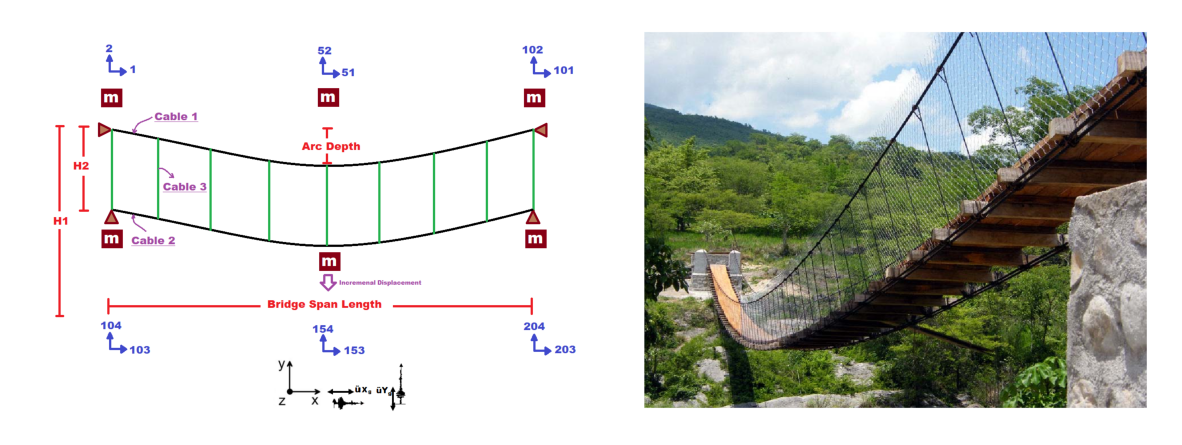

In [1]:
# Load the image
def PLOT_IMAGE(image):
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    image = mpimg.imread(image_path)

    # Display the image
    plt.figure(figsize=(15, 8))
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()
    
image_path = 'OPENSEES_CABLE_SUSPENSION_BRIDGE_02.png'    
PLOT_IMAGE(image_path)

In [2]:
# WEBSITE:
'https://www.semanticscholar.org/paper/CABLE-SUSPENDED-PEDESTRIAN-BRIDGE-DESIGN-FOR-RURAL-Bang/6dd8ec9c0d0ca6059af6d6cbb7e5b6e25aed5bcf'
# WEBSITE:
'https://www.istockphoto.com/nl/foto/voetgangers-brug-over-een-rivier-van-de-berg-leidt-tot-landelijke-huizen-verdrinken-gm1002006922-270792479'

'https://www.istockphoto.com/nl/foto/voetgangers-brug-over-een-rivier-van-de-berg-leidt-tot-landelijke-huizen-verdrinken-gm1002006922-270792479'

In [6]:
#import the os module
import os
import time
import numpy as np
import openseespy.opensees as op
import matplotlib.pyplot as plt

In [7]:
#to create a directory at specified path with name "Data"
os.mkdir('C:\\OPENSEESPY_SALAR')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\OPENSEESPY_SALAR'

In [8]:
FOLDER_NAME = 'OPENSEES_CABLE_SUSPENSION_BRIDGE'
dir = f"C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\"
if not os.path.exists(dir):
    os.makedirs(dir)

In [9]:
# OUTPUT DATA ADDRESS:
SALAR_DIR = f'C://OPENSEESPY_SALAR//{FOLDER_NAME}//';

In [10]:
## DELETE ALL FILES IN DIRECTORY 
def DELETE_FOLDER_CONTANTS(folder_path):
    import os
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
        except Exception as e:
            print(f"Failed to delete {file_path}. Reason: {e}")
    print("Deletion done")
   
FOLDER_PATH = f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}'  # Specify the folder path
#DELETE_FOLDER_CONTANTS(FOLDER_PATH)   

In [11]:
def CURRENT_TIME():
    import time
    t = time.localtime()
    current_time = time.strftime("%H:%M:%S", t)
    print(f"Current time (HH:MM:SS): {current_time}\n\n")
    
# ---------------------
def plot_shapes(initial_coords, displacements):
    import numpy as np
    import matplotlib.pyplot as plt
    """
    Plot the initial and deformed shapes of the arch.

    Parameters:
    - initial_coords: Initial coordinates of the nodes.
    - displacements: List of displacements for each node.
    """
    # Plot initial and deformed shape
    plt.figure(figsize=(12, 8))
    plt.plot(initial_coords[:num_nodes, 0], initial_coords[:num_nodes, 1], 'bo-', label='Initial Cable Shape')
    plt.plot(deformed_coords[:num_nodes, 0], deformed_coords[:num_nodes, 1], 'ro-', label='Deformed Cable Shape')
    plt.plot(initial_coords[num_nodes:, 0], initial_coords[num_nodes:, 1], 'go-', label='Initial Deck Shape')
    plt.plot(deformed_coords[num_nodes:, 0], deformed_coords[num_nodes:, 1], 'yo-', label='Deformed Deck Shape')
    
    # Plot connecting elements between the cable and the beam
    for i in range(num_nodes):
        plt.plot([initial_coords[i, 0], initial_coords[num_nodes + i, 0]],
                 [initial_coords[i, 1], initial_coords[num_nodes + i, 1]], 'c--', label='Initial Connecting Elements' if i == 0 else "")
        plt.plot([deformed_coords[i, 0], deformed_coords[num_nodes + i, 0]],
                 [deformed_coords[i, 1], deformed_coords[num_nodes + i, 1]], 'm--', label='Deformed Connecting Elements' if i == 0 else "")
    
    # Mark simply supported nodes with red triangles
    support_nodes = [0, num_nodes - 1, num_nodes, 2*num_nodes - 1]
    plt.plot(initial_coords[support_nodes, 0], initial_coords[support_nodes, 1], 'r^', markersize=20, label='Simply Supported Nodes')
    
    plt.xlabel('X [mm]')
    plt.ylabel('Y [mm]')
    plt.legend()
    plt.title('Pushover Analysis: Cable and Deck Deformed Shapes')
    plt.show()
    
# ---------------------

def plot_reactions(disp_x, reaction_x, disp_y, reaction_y):
    import matplotlib.pyplot as plt
    """
    Plot the base reaction versus displacement.

    Parameters:
    - disp_x: List of x displacements of the middle node.
    - reaction_x: List of base reactions in x.
    - disp_y: List of y displacements of the middle node.
    - reaction_y: List of base reactions in y.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(disp_x, reaction_x, 'b-')
    plt.xlabel('Displacement X [mm]')
    plt.ylabel('Base Reaction X [N]')
    plt.title('Base Reaction X vs. Displacement X')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(disp_y, reaction_y, 'r-')
    plt.xlabel('Displacement Y [mm]')
    plt.ylabel('Base Reaction Y [N]')
    plt.title('Base Reaction Y vs. Displacement Y')
    plt.show()
    
# ---------------------
"""
When OK equals -1, it generally indicates that the command or operation was not executed
because it was already in progress or had already been completed. This can happen if you
try to run a command that is already running or has been completed in a previous step.

When OK equals -2, it typically indicates that the command or operation was not executed
because it was not recognized or not implemented. This could mean that the command
is either misspelled, not available in the current version of OpenSees, or not applicable to the current context.

When OK equals -3, it typically means that the command or operation failed.
This could be due to various reasons, such as incorrect input parameters,
syntax errors, or issues with the model setup.
"""
def ANALYSIS(OK, INCREMENT, TOLERANCE, MAX_ITERAIONS):
    import openseespy.opensees as op
    test = {1:'NormDispIncr', 2: 'RelativeEnergyIncr', 4: 'RelativeNormUnbalance',5: 'RelativeNormDispIncr', 6: 'NormUnbalance'}
    algorithm = {1:'KrylovNewton', 2: 'SecantNewton' , 4: 'RaphsonNewton',5: 'PeriodicNewton', 6: 'BFGS', 7: 'Broyden', 8: 'NewtonLineSearch'}

    for i in test:
        for j in algorithm:
            if OK != 0:
                if j < 4:
                    op.algorithm(algorithm[j], '-initial')

                else:
                    op.algorithm(algorithm[j])

                op.test(test[i], TOLERANCE, MAX_ITERAIONS) 
                OK = op.analyze(INCREMENT)                            
                print(test[i], algorithm[j], OK)             
                if OK == 0:
                    break
            else:
                continue

In [ ]:
#          ############################################################################################
#          #                                          IN THE NAME OF ALLAH                            #
#          #                         PUSHOVER ANALYSIS OF CABLE SUSPENSION BRIDGE 02                  #
#          #------------------------------------------------------------------------------------------#
#          #                  THIS PROGRAM WRITTEN BY SALAR DELAVAR GHASHGHAEI (QASHQAI)              #
#          #                            EMAIL: salar.d.ghashghaei@gmail.com                           #
#          ############################################################################################

In [12]:
# --------------------
#   PUSHOVER ANALYSIS
# --------------------
def PUSHOVER_ANALYSIS( LINEAR, L, H1, H2, arc_depth, E_cable, Cable_Dia_01, Cable_Dia_02, Cable_Dia_03, num_nodes, MAX_DISP, disp_incr, MAX_ITERATIONS, TOLERANCE):
    import openseespy.opensees as ops
    import numpy as np
    
    A_cable_01 = (np.pi * Cable_Dia_01 **2) / 4  # [mm^2] Horizontal Longitudinal Cable Area Bottom
    A_cable_02 = (np.pi * Cable_Dia_02 **2) / 4  # [mm^2] Horizontal Longitudinal Cable Area Top
    A_cable_03 = (np.pi * Cable_Dia_03 **2) / 4  # [mm^2] Vertical Longitudinal Cable Area Top
    
    # Define model builder
    ops.wipe()
    ops.model('basic', '-ndm', 2, '-ndf', 2)
    dx = L / (num_nodes - 1)
    # Create nodes
    for i in range(num_nodes):
        X = i * dx
        Y1 = H1 - arc_depth * np.sin(np.pi * X / L)
        Y2 = Y1 - H2
        ops.node(i + 1, X, Y1)
        ops.node(num_nodes + i + 1, i * dx, Y2)

    # Define boundary conditions (fixed at both ends)
    ops.fix(1, 1, 1)              # TOP CABLE
    ops.fix(num_nodes, 1, 1)      # TOP CABLE
    ops.fix(num_nodes + 1, 1, 1)  # BOTTOM CABLE
    ops.fix(2 * num_nodes, 1, 1)  # BOTTOM CABLE
    
    # Define material properties
    if LINEAR == True:
        ops.uniaxialMaterial('Elastic', 1, E_cable)
        #                                  TENSION    COMPRESSION
        #ops.uniaxialMaterial('Elastic', 1, E_cable, 0, 0.5 * E_cable)
    if LINEAR == False:
        Fy_cable = 355   # [N/mm^2] Yield strength of the cable
        b0 = 0.01
        ops.uniaxialMaterial('Steel01', 1, Fy_cable, E_cable, b0)
    
    # Define truss elements
    for i in range(num_nodes - 1):
        ops.element('corotTruss', i + 1, i + 1, i + 2, A_cable_02, 1)  # Top Cable element
        ops.element('corotTruss', num_nodes + i + 1, num_nodes + i + 1, num_nodes + i + 2, A_cable_01, 1)  # Bottom Cable Element

    # Connect each node of the cable with the corresponding node of the deck using truss elements
    for i in range(num_nodes):
        ops.element('corotTruss', 2 * num_nodes + i + 1, i + 1, num_nodes + i + 1, A_cable_03, 1) # Vertical Cable Element
    
    #mid_node = num_nodes // 2 + 1
    mid_node = int(num_nodes + 0.5 * num_nodes)
    # Define load pattern with displacement at the middle span
    ops.timeSeries('Linear', 1)
    ops.pattern('Plain', 1, 1)
    ops.load(mid_node, 0.0, -1)  # Apply a horizontal load at node
    
    n_steps = int(np.abs(MAX_DISP / disp_incr))  # Analysis Steps
    
    # Define analysis parameters
    ops.system('BandGeneral')
    ops.numberer('Plain')
    ops.constraints('Plain')
    ops.integrator('DisplacementControl', mid_node, 2, disp_incr)
    ops.test('EnergyIncr', TOLERANCE, MAX_ITERATIONS)
    ops.algorithm('ModifiedNewton')
    ops.analysis('Static')

    # OUTPUT DATA
    ops.recorder('Node', '-file', f"{SALAR_DIR}DTH_PUSH.txt",'-time', '-node', mid_node, '-dof', 1,2, 'disp')# Displacement Time History
    ops.recorder('Node', '-file', f"{SALAR_DIR}BTH_PUSH_01.txt",'-time', '-node', 1, '-dof', 1,2, 'reaction')# Base Shear Time History
    ops.recorder('Node', '-file', f"{SALAR_DIR}BTH_PUSH_02.txt",'-time', '-node', num_nodes, '-dof', 1,2, 'reaction')# Base Shear Time History
    ops.recorder('Node', '-file', f"{SALAR_DIR}BTH_PUSH_03.txt",'-time', '-node', num_nodes + 1, '-dof', 1,2, 'reaction')# Base Shear Time History
    ops.recorder('Node', '-file', f"{SALAR_DIR}BTH_PUSH_04.txt",'-time', '-node', 2*num_nodes, '-dof', 1,2, 'reaction')# Base Shear
    
    DISPLACEMENTS = []
    DISP_X , DISP_Y = [], []
    BASE_REACTION_X, BASE_REACTION_Y = [], []
    
    # Perform the analysis with increments
    for i in range(n_steps):
        OK = ops.analyze(1)
        ANALYSIS(OK, 1, TOLERANCE, MAX_ITERATIONS)
        DISPLACEMENTS.append([ops.nodeDisp(j + 1) for j in range(num_nodes * 2)])
        DISP_X.append(ops.nodeDisp(mid_node, 1))
        DISP_Y.append(ops.nodeDisp(mid_node, 2))
        x1 = ops.nodeResponse(1, 1, 6)
        x2 = ops.nodeResponse(num_nodes, 1, 6)
        x3 = ops.nodeResponse(num_nodes + 1, 1, 6)
        x4 = ops.nodeResponse(2*num_nodes, 1, 6)
        y1 = ops.nodeResponse(1, 2, 6)
        y2 = ops.nodeResponse(num_nodes, 2, 6)
        y3 = ops.nodeResponse(num_nodes + 1, 2, 6)
        y4 = ops.nodeResponse(2*num_nodes, 2, 6)
        BASE_REACTION_X.append(x1+x2+x3+x4) # CABLE REACION-X
        BASE_REACTION_Y.append(y1+y2+y3+y4) # CABLE REACION-Y
        #print(f'STEP: {i+1}')
    
    # Get initial and final node coordinates for plotting
    initial_coords = np.array([ops.nodeCoord(i + 1) for i in range(num_nodes * 2)])
    deformed_coords = initial_coords + np.array(DISPLACEMENTS[-1])
    
    # Output all unconstrained node displacements
    for i in range(num_nodes * 2):
        disp = ops.nodeDisp(i + 1)
        print(f"Node {i + 1}: X Displacement = {disp[0]}, Y Displacement = {disp[1]}")
    
    return initial_coords, deformed_coords, DISPLACEMENTS, DISP_X, DISP_Y, BASE_REACTION_X, BASE_REACTION_Y

In [13]:
# --------------------
#   PUSHOVER ANALYSIS
# --------------------
# Parameters for the analysis
L = 50000.0   # [mm] Bridge span lentgh
H1 = 12000.0  # [mm] Height of Top Cable
H2 = 2000     # [mm] Height of Bottom Cable
arc_depth = 1000.0 # [mm]
E_cable = 210e5    # [N/mm^2] Modulus of elasticity Cable
Cable_Dia_01 = 25  # [mm] Horizontal Longitudinal Cable Diameter Bottom
Cable_Dia_02 = 18  # [mm] Horizontal Longitudinal Cable Diameter Top
Cable_Dia_03 = 10  # [mm] Vertical Longitudinal Cable Diameter Top 
num_nodes = 51 # Cable Arc Number of nodes
MAX_DISP = -500.0   # [mm] Maximum Displacment
disp_incr = -0.01 # [mm] Incremental Displacement

MAX_ITERATIONS = 50000  # Maximum number of iterations
TOLERANCE = 1.0e-10     # Tolerance for convergence

LINEAR = True # False: Cable Nonlinear Materials Properties

starttime = time.process_time()
# Run the analysis
results = PUSHOVER_ANALYSIS(LINEAR, L, H1, H2, arc_depth, E_cable, Cable_Dia_01, Cable_Dia_02, Cable_Dia_03, num_nodes, MAX_DISP, disp_incr, MAX_ITERATIONS, TOLERANCE)
initial_coords, deformed_coords, DISPLACEMENTS, DISP_X, DISP_Y, BASE_REACTION_X, BASE_REACTION_Y = results
totaltime = time.process_time() - starttime
print(f'\nTotal time (s): {totaltime:.4f} \n\n')

after: 50000 iterations
 current EnergyIncr: -nan(ind) (max: 1e-10) 	Norm deltaX: nan, Norm deltaR: nan
ModifiedNewton::solveCurrentStep() -the ConvergenceTest object failed in test()
StaticAnalysis::analyze() - the Algorithm failed at step: 0 with domain at load factor -nan(ind)
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton 0
Node 1: X Displacement = 0.0, Y Displacement = 0.0
Node 2: X Displacement = 40.9909964865675, Y Displacement = 0.6597248531402142
Node 3: X Displacement = 81.96589060086747, Y Displacement = 1.0726044562576544
Node 4: X Displacement = 122.90883321705017, Y Displacement = 0.9927571299360808
Node 5: X Displacement = 163.80447767906463, Y Displacement = 0.17622338640625676
Node 6: X Displacement = 204.63822122023302, Y Displacement = -1.6180821470261337
Node 7: X Displacement = 245.39643478238295, Y Displacement = -4.627429561193242
Node 8: X Displacement = 286.0666776364837, Y Displacement = -9.084346868911167
Node 9: X Displacement = 326.6378934396328, Y Displacement = -15.21571109446846
Node 10: X Displacement = 367.10058464532625, Y Displacement = -23.24186069894603
Node 11: X Displacement = 407.4469625137423, Y Displacement = -33.37573272112985
Node 12: X Displacement = 447.6710703421024, Y Displacement = -45.82202793258861
Node 13: X Displacement = 487.76

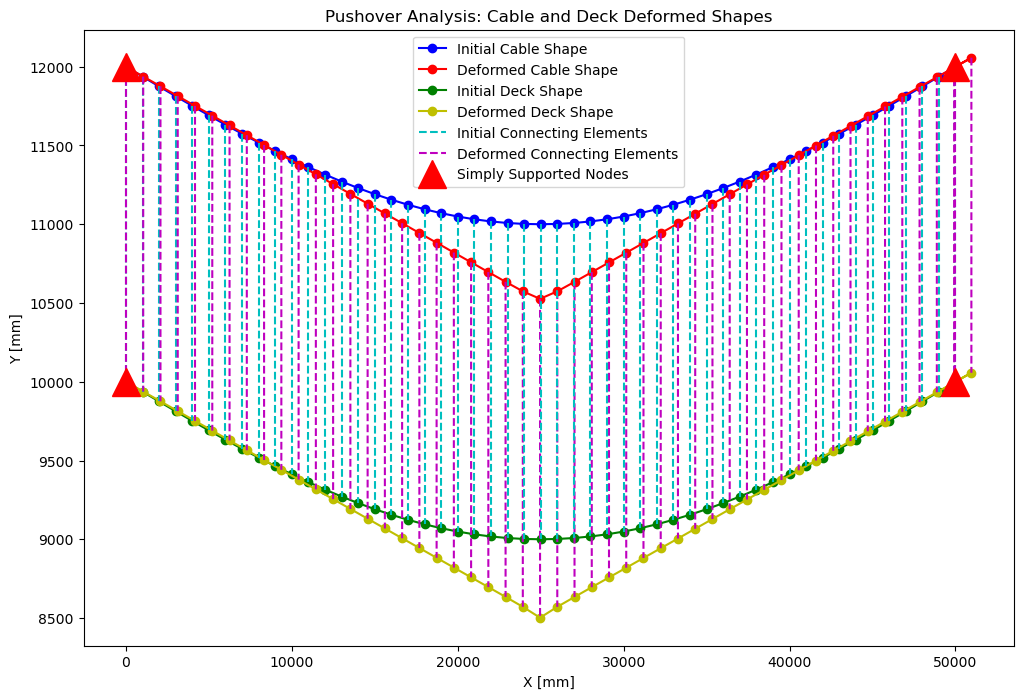

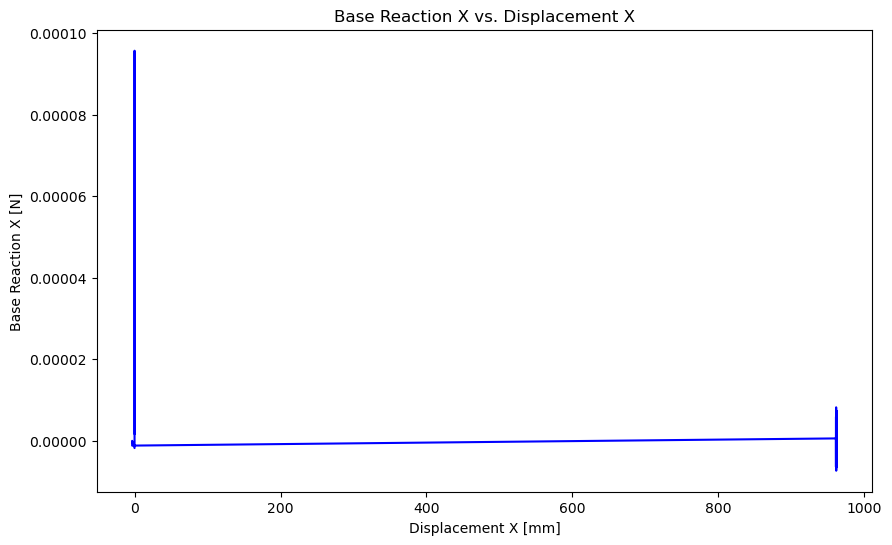

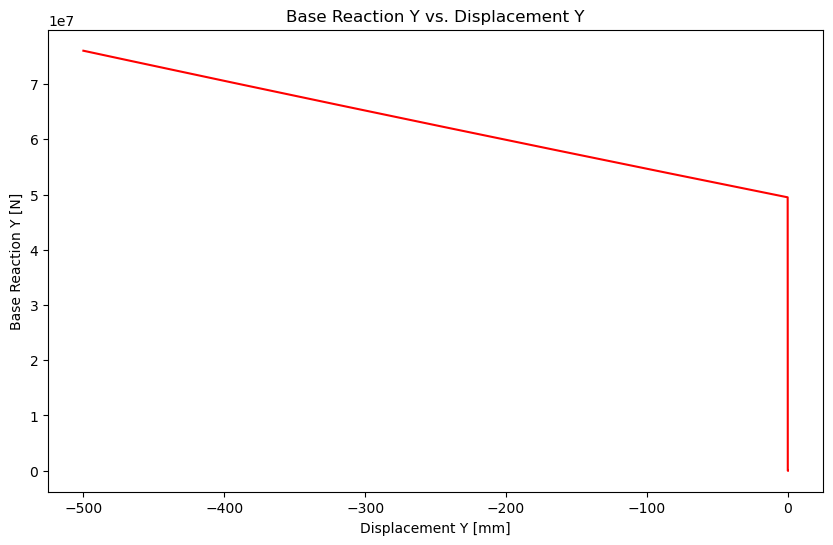

In [14]:
# Plot results
plot_shapes(initial_coords, DISPLACEMENTS)
plot_reactions(DISP_X, BASE_REACTION_X, DISP_Y, BASE_REACTION_Y)

In [9]:
#          ############################################################################################
#          #                                          IN THE NAME OF ALLAH                            #
#          #                     FREE VIBRATION ANALYSIS OF CABLE SUSPENSION BRIDGE 02                #
#          #------------------------------------------------------------------------------------------#
#          #                  THIS PROGRAM WRITTEN BY SALAR DELAVAR GHASHGHAEI (QASHQAI)              #
#          #                            EMAIL: salar.d.ghashghaei@gmail.com                           #
#          ############################################################################################

In [16]:
# --------------------------
#   FREE VIBRATION ANALYSIS
# --------------------------
def FREE_VIBRATION_ANALYSIS(damping, damping_ratio, LINEAR, duration, dt, TOTAL_MASS, u0, L, H1, H2, arc_depth, E_cable, Cable_Dia_01, Cable_Dia_02, Cable_Dia_03, num_nodes, MAX_ITERATIONS, TOLERANCE):
    import openseespy.opensees as ops
    import numpy as np
    import matplotlib.pyplot as plt
    
    A_cable_01 = (np.pi * Cable_Dia_01 **2) / 4  # [mm^2] Horizontal Longitudinal Cable Area Bottom
    A_cable_02 = (np.pi * Cable_Dia_02 **2) / 4  # [mm^2] Horizontal Longitudinal Cable Area Top
    A_cable_03 = (np.pi * Cable_Dia_03 **2) / 4  # [mm^2] Vertical Longitudinal Cable Area Top
    
    # Define model builder
    ops.wipe()
    ops.model('basic', '-ndm', 2, '-ndf', 2)
    KE = 1;
    dx = L / (num_nodes - 1)
    MASS = TOTAL_MASS / num_nodes
    # Create nodes
    for i in range(num_nodes):
        X = i * dx
        Y1 = H1 - arc_depth * np.sin(np.pi * X / L)
        Y2 = Y1 - H2
        ops.node(i + 1, X, Y1)
        ops.node(num_nodes + i + 1, i * dx, Y2)
        # Define mass
        ops.mass(num_nodes + i + 1, MASS, MASS, 0)

    # Define boundary conditions (fixed at both ends)
    ops.fix(1, 1, 1)              # TOP CABLE
    ops.fix(num_nodes, 1, 1)      # TOP CABLE
    ops.fix(num_nodes + 1, 1, 1)  # BOTTOM CABLE
    ops.fix(2 * num_nodes, 1, 1)  # BOTTOM CABLE
    
    # Define material properties
    if LINEAR == True:
        ops.uniaxialMaterial('Elastic', 1, E_cable)
        #                                  TENSION    COMPRESSION
        #ops.uniaxialMaterial('Elastic', 1, E_cable, 0, 0.5 * E_cable)
    if LINEAR == False:
        Fy_cable = 355   # [N/mm^2] Yield strength of the cable
        b0 = 0.01
        ops.uniaxialMaterial('Steel01', 1, Fy_cable, E_cable, b0)
    
    # Define truss elements
    for i in range(num_nodes - 1):
        ops.element('corotTruss', i + 1, i + 1, i + 2, A_cable_02, 1)  # Top Cable element
        ops.element('corotTruss', num_nodes + i + 1, num_nodes + i + 1, num_nodes + i + 2, A_cable_01, 1)  # Bottom Cable Element

    # Connect each node of the cable with the corresponding node of the deck using truss elements
    for i in range(num_nodes):
        ops.element('corotTruss', 2 * num_nodes + i + 1, i + 1, num_nodes + i + 1, A_cable_03, 1) # Vertical Cable Element
    
    #mid_node = num_nodes // 2 + 1
    mid_node = int(num_nodes + 0.5 * num_nodes)
    # Define load pattern with displacement at the middle span
    ops.timeSeries('Linear', 1)
    ops.pattern('Plain', 1, 1)
    ops.load(mid_node, 0.0, -1)  # Apply a horizontal load at node
    ops.constraints('Transformation')
    ops.numberer('RCM')
    ops.system('BandGeneral')
    ops.algorithm('Newton')
    ops.test('EnergyIncr', TOLERANCE, MAX_ITERATIONS)
    ops.integrator('DisplacementControl', mid_node, 2, u0)
    ops.analysis('Static')
    ops.analyze(1)

    ops.setTime(0.0)

    # Wipe analysis and reset time
    ops.wipeAnalysis()
    ops.remove('loadPattern', 1)
    ops.system('UmfPack')

    # Dynamic analysis
    ops.constraints('Transformation')
    ops.numberer('RCM')
    ops.system('UmfPack')
    ops.test('EnergyIncr', TOLERANCE, MAX_ITERATIONS)
    ops.integrator('Newmark', 0.5, 0.25)
    ops.algorithm('Newton')

    if damping == True:
        # Calculate Rayleigh damping factors
        omega1 = np.sqrt(KE / TOTAL_MASS)
        omega2 = 2 * omega1  # Just an assumption for two modes
        a0 = damping_ratio * (2 * omega1 * omega2) / (omega1 + omega2)
        a1 = damping_ratio * 2 / (omega1 + omega2)
        # Apply Rayleigh damping
        ops.rayleigh(a0, a1, 0, 0)

    ops.analysis('Transient')

    # OUTPUT DATA
    ops.recorder('Node', '-file', f"{SALAR_DIR}DTH_DYN.txt",'-time', '-node', mid_node, '-dof', 1,2, 'disp')# Displacement Time History
    ops.recorder('Node', '-file', f"{SALAR_DIR}VTH_DYN.txt",'-time', '-node', mid_node, '-dof', 1,2, 'vel')  # Velocity Time History
    ops.recorder('Node', '-file', f"{SALAR_DIR}ATH_DYN.txt",'-time', '-node', mid_node, '-dof', 1,2, 'accel') # Acceleration Time History
    ops.recorder('Node', '-file', f"{SALAR_DIR}BTH_DYN_01.txt",'-time', '-node', 1, '-dof', 1,2, 'reaction')# Base Shear Time History
    ops.recorder('Node', '-file', f"{SALAR_DIR}BTH_DYN_02.txt",'-time', '-node', num_nodes, '-dof', 1,2, 'reaction')# Base Shear Time History
    ops.recorder('Node', '-file', f"{SALAR_DIR}BTH_DYN_03.txt",'-time', '-node', num_nodes + 1, '-dof', 1,2, 'reaction')# Base Shear Time History
    ops.recorder('Node', '-file', f"{SALAR_DIR}BTH_DYN_04.txt",'-time', '-node', 2*num_nodes, '-dof', 1,2, 'reaction')# Base Shear Time History

    DISPLACEMENTS = []
    DISP_X , DISP_Y, VELOCITY, ACCELERATION = [], [], [], []
    BASE_REACTION_X, BASE_REACTION_Y = [], []

    stable = 0
    current_time = 0.0
     # Perform the analysis with increments
    while stable == 0 and current_time < duration:
        OK = ops.analyze(1, dt)
        ANALYSIS(OK, 1, TOLERANCE, MAX_ITERATIONS)
        current_time = ops.getTime()
        DISPLACEMENTS.append([ops.nodeDisp(j + 1) for j in range(num_nodes * 2)])
        DISP_X.append(ops.nodeDisp(mid_node, 1))
        DISP_Y.append(ops.nodeDisp(mid_node, 2))
        VELOCITY.append(ops.nodeVel(mid_node, 2))
        ACCELERATION.append(ops.nodeAccel(mid_node, 2))
        x1 = ops.nodeResponse(1, 1, 6)
        x2 = ops.nodeResponse(num_nodes, 1, 6)
        x3 = ops.nodeResponse(num_nodes + 1, 1, 6)
        x4 = ops.nodeResponse(2*num_nodes, 1, 6)
        y1 = ops.nodeResponse(1, 2, 6)
        y2 = ops.nodeResponse(num_nodes, 2, 6)
        y3 = ops.nodeResponse(num_nodes + 1, 2, 6)
        y4 = ops.nodeResponse(2*num_nodes, 2, 6)
        BASE_REACTION_X.append(x1+x2+x3+x4) # CABLE REACION-X
        BASE_REACTION_Y.append(y1+y2+y3+y4) # CABLE REACION-Y
        KE =  np.abs(BASE_REACTION_Y[-1] / DISP_Y[-1]) # Effective Lateral Stiffness
        ##print(f'time: {current_time}')
    
    # Get initial and final node coordinates for plotting
    initial_coords = np.array([ops.nodeCoord(i + 1) for i in range(num_nodes * 2)])
    deformed_coords = initial_coords + np.array(DISPLACEMENTS[-1])
    
    # Output all unconstrained node displacements
    for i in range(num_nodes * 2):
        disp = ops.nodeDisp(i + 1)
        print(f"Node {i + 1}: X Displacement = {disp[0]}, Y Displacement = {disp[1]}")
    
    return initial_coords, deformed_coords, DISPLACEMENTS, VELOCITY, ACCELERATION, DISP_X, DISP_Y, BASE_REACTION_X, BASE_REACTION_Y

In [17]:
# Define the plotting function
def plot_time_history(TIME, DISP_X_undamped, DISP_X_damped, DISP_Y_undamped, DISP_Y_damped,
                      VELOCITY_undamped, VELOCITY_damped, ACCELERATION_undamped, ACCELERATION_damped,
                      BASE_REACTION_X_undamped, BASE_REACTION_X_damped, BASE_REACTION_Y_undamped, BASE_REACTION_Y_damped):
    import matplotlib.pyplot as plt
    import numpy as np
    
    plt.figure(figsize=(14, 26))

    # Displacement X
    plt.subplot(6, 1, 1)
    P1 = np.max(np.abs(np.array(DISP_X_undamped)))
    P2 = np.max(np.abs(np.array(DISP_X_damped)))
    plt.plot(TIME, DISP_X_undamped, color='black', label=f'Undamped: {P1:.4e}')
    plt.plot(TIME, DISP_X_damped, color='red', label=f'Damped: {P2:.4e}')
    plt.xlabel('Time [s]')
    plt.ylabel('Displacement X [mm]')
    plt.legend()

    # Displacement Y
    plt.subplot(6, 1, 2)
    P1 = np.max(np.abs(np.array(DISP_Y_undamped)))
    P2 = np.max(np.abs(np.array(DISP_Y_damped)))
    plt.plot(TIME, DISP_Y_undamped, color='black', label=f'Undamped: {P1:.4e}')
    plt.plot(TIME, DISP_Y_damped, color='red', label=f'Damped: {P2:.4e}')
    plt.xlabel('Time [s]')
    plt.ylabel('Displacement Y [mm]')
    plt.legend()

    # Velocity
    plt.subplot(6, 1, 3)
    P1 = np.max(np.abs(np.array(VELOCITY_damped)))
    P2 = np.max(np.abs(np.array(VELOCITY_undamped)))
    plt.plot(TIME, VELOCITY_undamped, color='black', label=f'Undamped: {P1:.4e}')
    plt.plot(TIME, VELOCITY_damped, color='red', label=f'Damped: {P2:.4e}')
    plt.xlabel('Time [s]')
    plt.ylabel('Velocity [mm/s]')
    plt.legend()

    # Acceleration
    plt.subplot(6, 1, 4)
    P1 = np.max(np.abs(np.array(ACCELERATION_undamped)))
    P2 = np.max(np.abs(np.array(ACCELERATION_damped)))
    plt.plot(TIME, ACCELERATION_undamped, color='black', label=f'Undamped: {P1:.4e}')
    plt.plot(TIME, ACCELERATION_damped, color='red', label=f'Damped: {P2:.4e}')
    plt.xlabel('Time [s]')
    plt.ylabel('Acceleration [mm/s^2]')
    plt.legend()

    # Base Reaction X
    plt.subplot(6, 1, 5)
    P1 = np.max(np.abs(np.array(BASE_REACTION_X_undamped)))
    P2 = np.max(np.abs(np.array(BASE_REACTION_X_damped)))
    plt.plot(TIME, BASE_REACTION_X_undamped, color='black', label=f'Undamped: {P1:.4e}')
    plt.plot(TIME, BASE_REACTION_X_damped, color='red', label=f'Damped: {P2:.4e}')
    plt.xlabel('Time [s]')
    plt.ylabel('Base Reaction X [N]')
    plt.legend()

    # Base Reaction Y
    plt.subplot(6, 1, 6)
    P1 = np.max(np.abs(np.array(BASE_REACTION_Y_undamped)))
    P2 = np.max(np.abs(np.array(BASE_REACTION_Y_damped)))
    plt.plot(TIME, BASE_REACTION_Y_undamped, color='black', label=f'Undamped: {P1:.4e}')
    plt.plot(TIME, BASE_REACTION_Y_damped, color='red', label=f'Damped: {P2:.4e}')
    plt.xlabel('Time [s]')
    plt.ylabel('Base Reaction Y [N]')
    plt.legend()
    
    plt.suptitle('Time History of Free Vibration Analysis: Damped vs Undamped')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [18]:
# --------------------------
#   FREE VIBRATION ANALYSIS
# --------------------------
# Parameters for the analysis
L = 50000.0   # [mm] Bridge span lentgh
H1 = 12000.0  # [mm] Height of Top Cable
H2 = 2000     # [mm] Height of Bottom Cable 
arc_depth = 1000.0 # [mm]
E_cable = 210e5    # [N/mm^2] Modulus of elasticity Cable
Cable_Dia_01 = 25  # [mm] Horizontal Longitudinal Cable Diameter Bottom
Cable_Dia_02 = 18  # [mm] Horizontal Longitudinal Cable Diameter Top
Cable_Dia_03 = 10  # [mm] Vertical Longitudinal Cable Diameter Top 
num_nodes = 51 # Cable Arc Number of nodes

TOTAL_MASS = 500000.0  # [kg] Total Mass of Structure
u0 = 2.0  # [mm] Initial displacement
damping_ratio = 0.05  # Damping ratio
duration = 50.0  # [s] Duration of the analysis in seconds
dt = 0.01  # Time step in seconds

MAX_ITERATIONS = 10000  # Maximum number of iterations
TOLERANCE = 1.0e-14     # Tolerance for convergence

import time
starttime = time.process_time()

# Run the undamped analysis
damping = False
LINEAR = True # False: Cable Nonlinear Materials Properties
results_undamped = FREE_VIBRATION_ANALYSIS(damping, damping_ratio, LINEAR, duration, dt, TOTAL_MASS, u0, L, H1, H2, arc_depth, E_cable, Cable_Dia_01, Cable_Dia_02, Cable_Dia_03, num_nodes, MAX_ITERATIONS, TOLERANCE)
initial_coords, deformed_coords, DISPLACEMENTS_undamped, VELOCITY_undamped, ACCELERATION_undamped, DISP_X_undamped, DISP_Y_undamped, BASE_REACTION_X_undamped, BASE_REACTION_Y_undamped = results_undamped

# Run the damped analysis
damping = True
LINEAR = True # False: Cable Nonlinear Materials Properties
results_damped = FREE_VIBRATION_ANALYSIS(damping, damping_ratio,  LINEAR, duration, dt, TOTAL_MASS, u0, L, H1, H2, arc_depth, E_cable, Cable_Dia_01, Cable_Dia_02, Cable_Dia_03, num_nodes, MAX_ITERATIONS, TOLERANCE)
initial_coords, deformed_coords, DISPLACEMENTS_damped, VELOCITY_damped, ACCELERATION_damped, DISP_X_damped, DISP_Y_damped, BASE_REACTION_X_damped, BASE_REACTION_Y_damped = results_damped

totaltime = time.process_time() - starttime
print(f'\nTotal time (s): {totaltime:.4f} \n\n')

Node 1: X Displacement = 0.0, Y Displacement = 0.0
Node 2: X Displacement = -30.718668519346693, Y Displacement = -266.15342691477963
Node 3: X Displacement = -20.586939650564606, Y Displacement = -362.7793805073048
Node 4: X Displacement = 1.6191300734020357, Y Displacement = -290.89475908844895
Node 5: X Displacement = -109.92970300030427, Y Displacement = 280.5076592375267
Node 6: X Displacement = -89.64066716735655, Y Displacement = 377.18029364874707
Node 7: X Displacement = -91.01187381974067, Y Displacement = 650.9705333436825
Node 8: X Displacement = -118.90527498512695, Y Displacement = 395.8699507217365
Node 9: X Displacement = -103.09535238152199, Y Displacement = 353.85176683903217
Node 10: X Displacement = -84.57948723170868, Y Displacement = 470.8833250254912
Node 11: X Displacement = -122.97982777416968, Y Displacement = 867.4623019382296
Node 12: X Displacement = -185.80988732747971, Y Displacement = 1324.5220803802215
Node 13: X Displacement = -172.72701627058728, Y Di

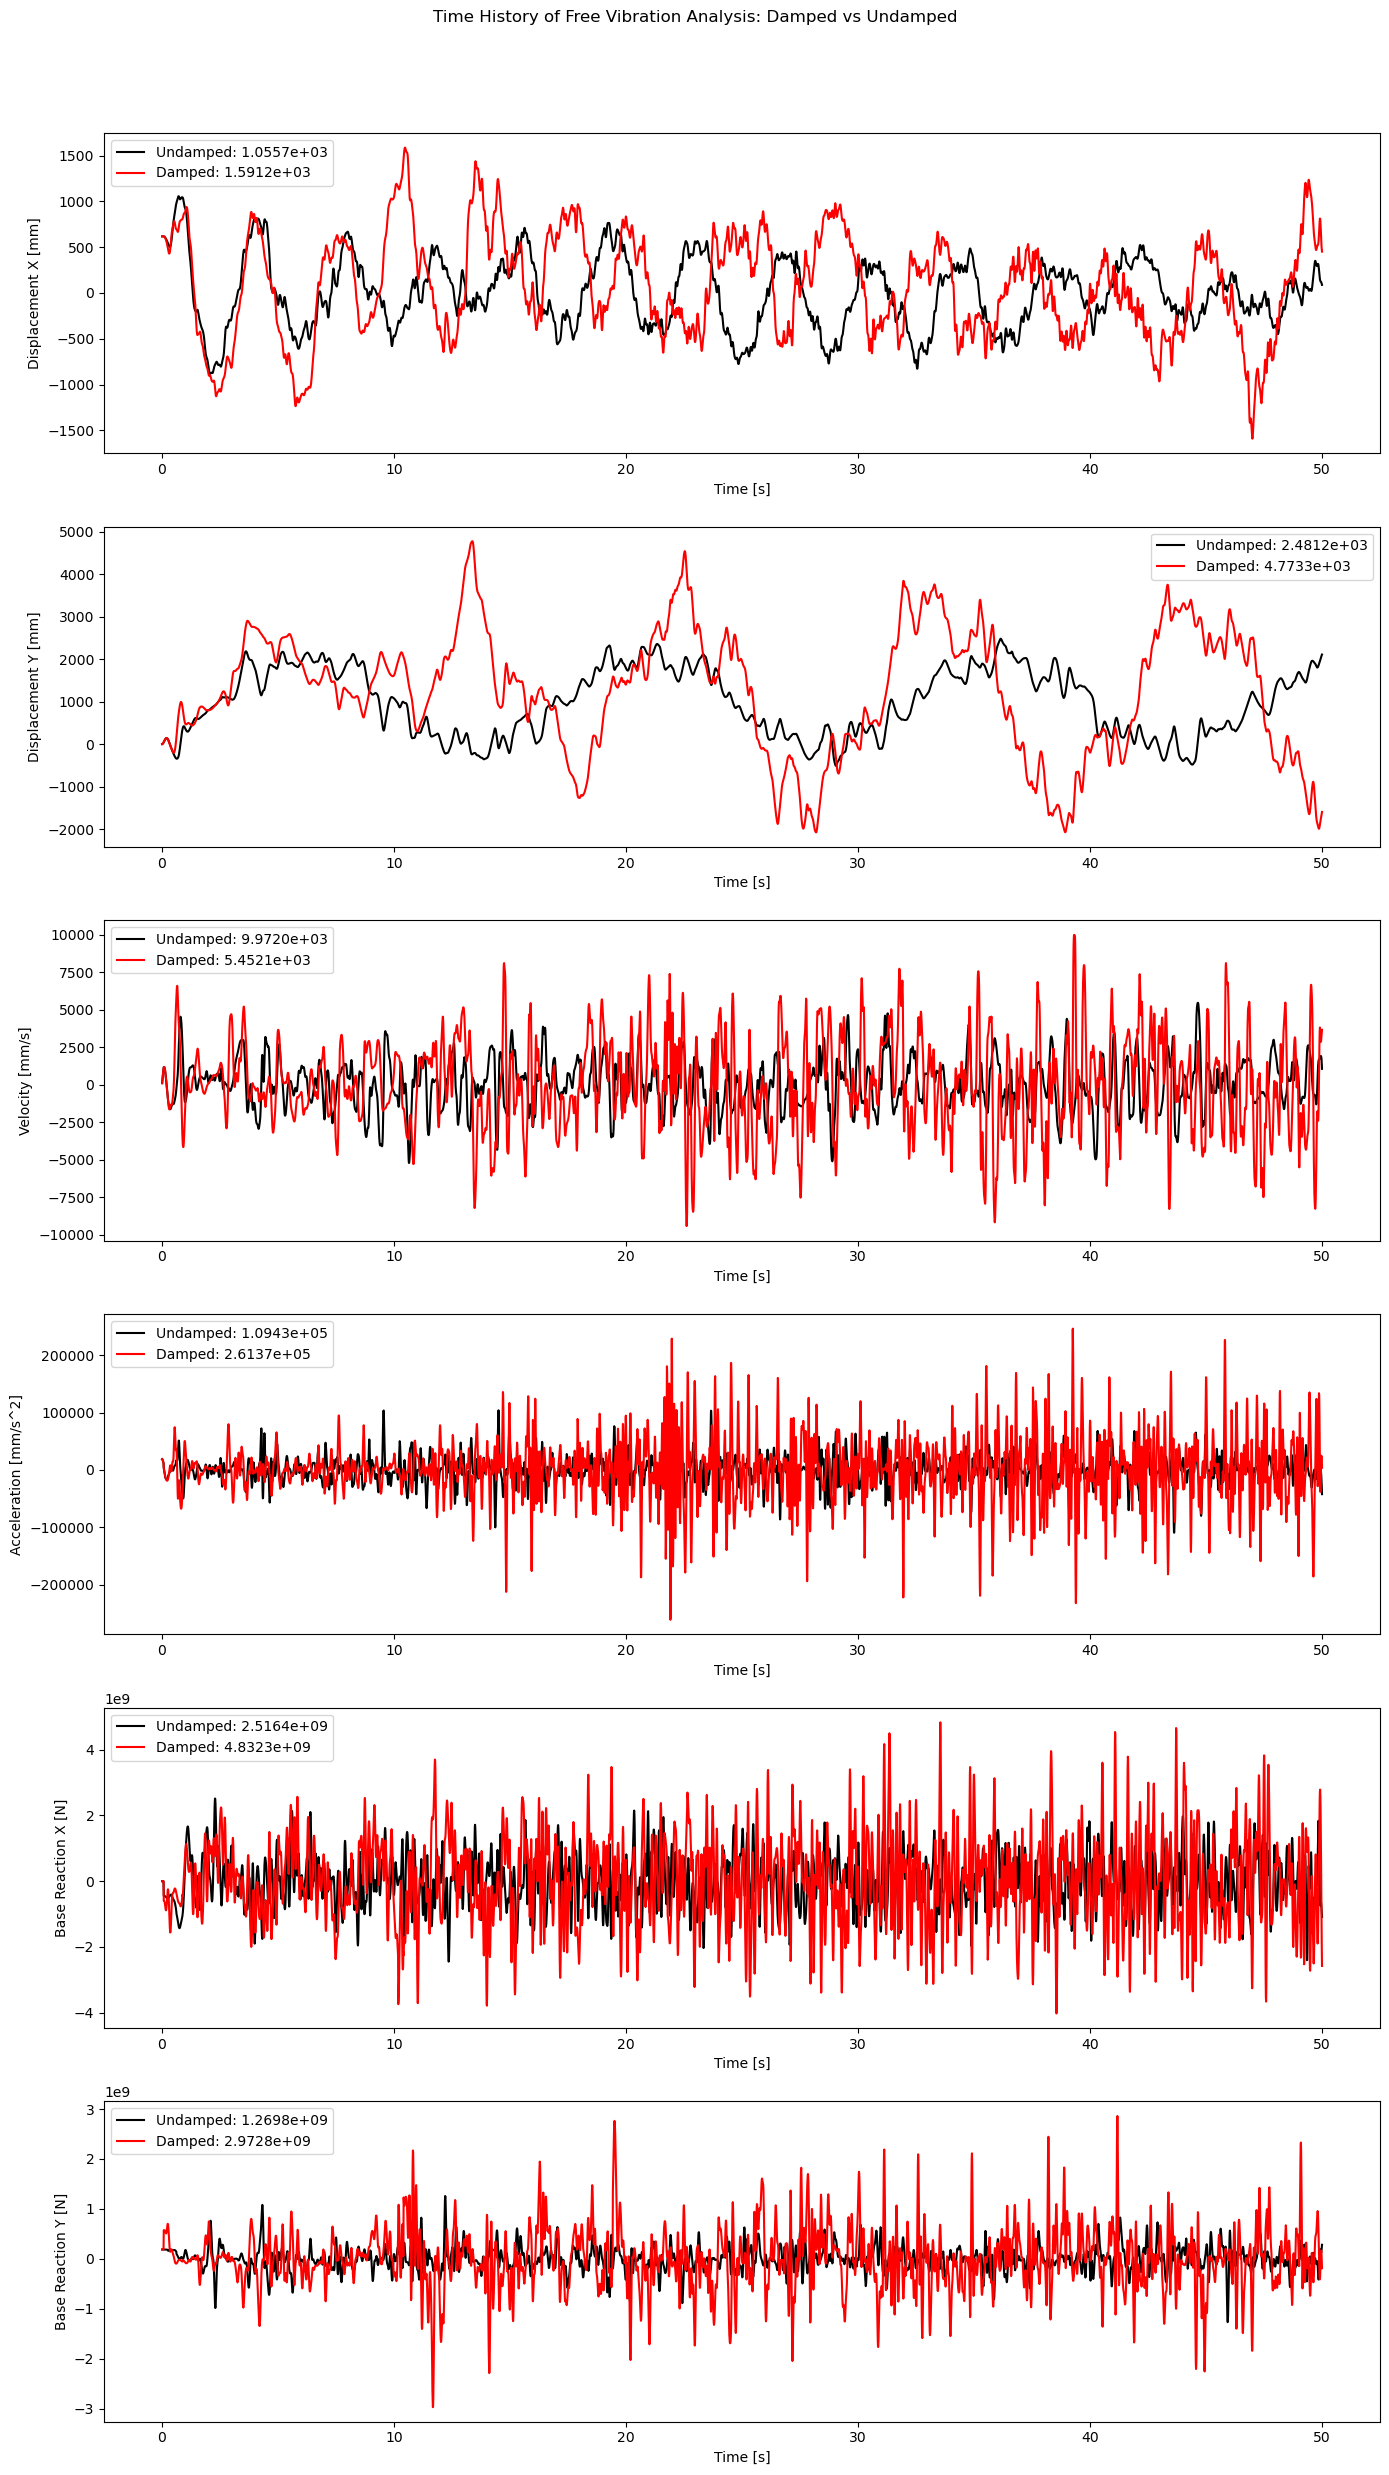

In [19]:
# Plotting the time history
TIME = np.arange(dt, duration+2*dt, dt)

plot_time_history(TIME, DISP_X_undamped, DISP_X_damped, DISP_Y_undamped, DISP_Y_damped,
                  VELOCITY_undamped, VELOCITY_damped, ACCELERATION_undamped, ACCELERATION_damped,
                  BASE_REACTION_X_undamped, BASE_REACTION_X_damped, BASE_REACTION_Y_undamped, BASE_REACTION_Y_damped)

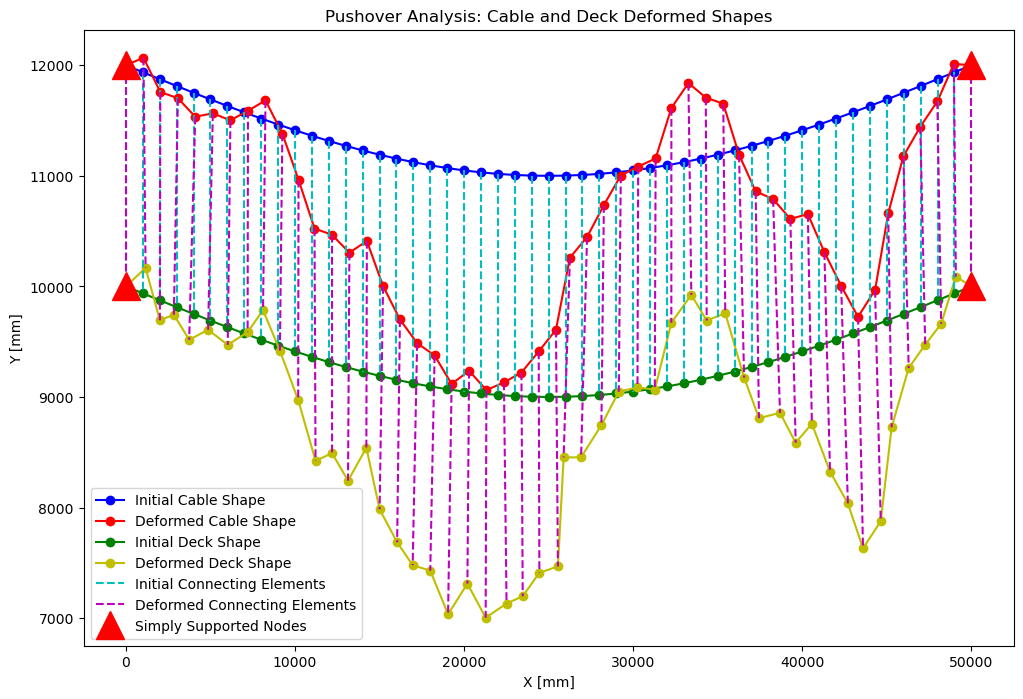

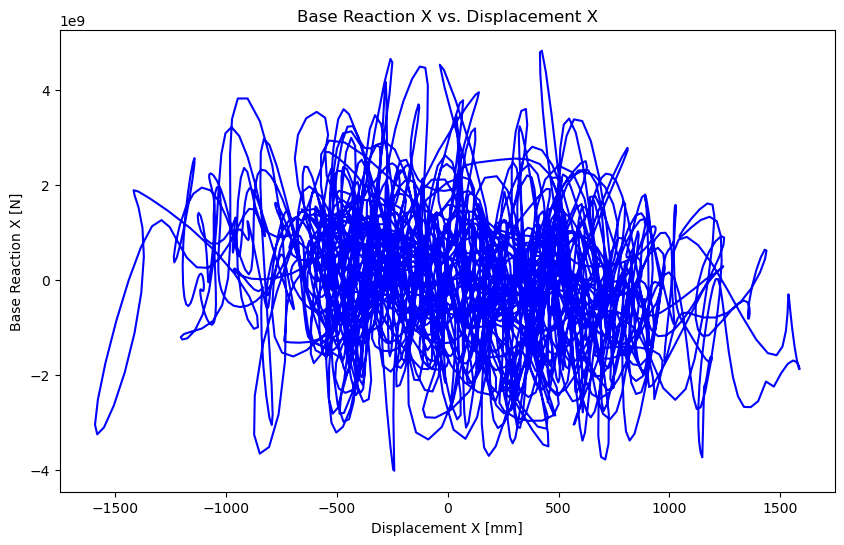

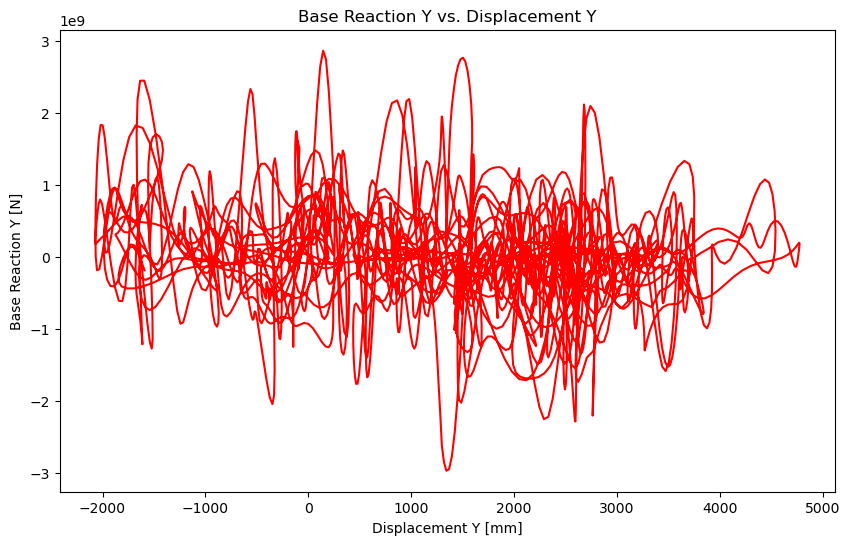

In [20]:
# Plot damped results
plot_shapes(initial_coords, DISPLACEMENTS_damped)
plot_reactions(DISP_X_damped, BASE_REACTION_X_damped, DISP_Y_damped, BASE_REACTION_Y_damped)

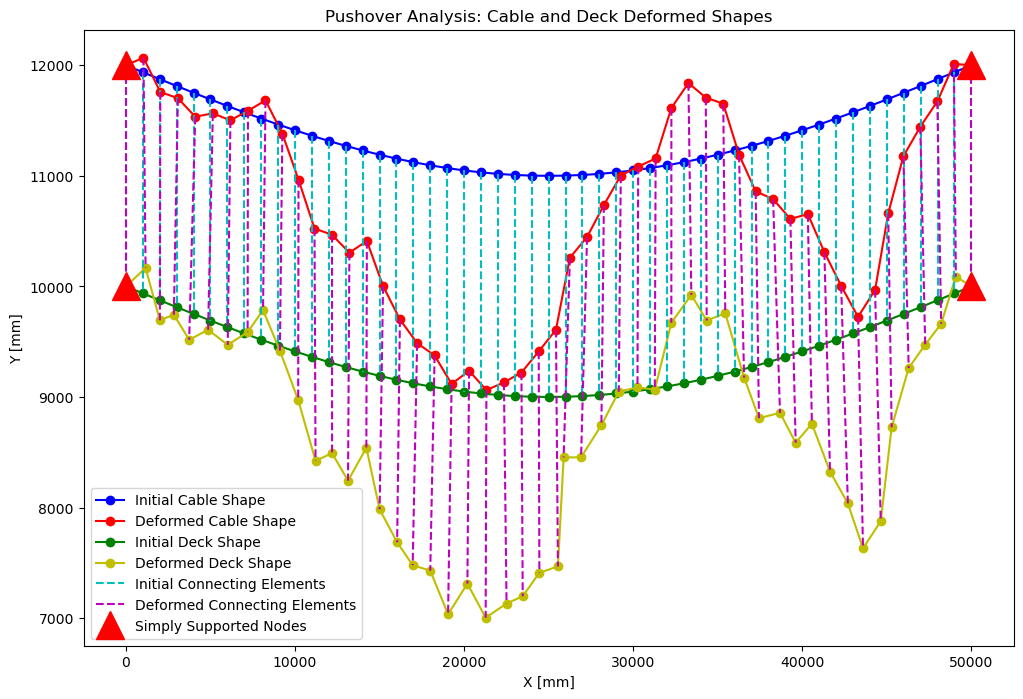

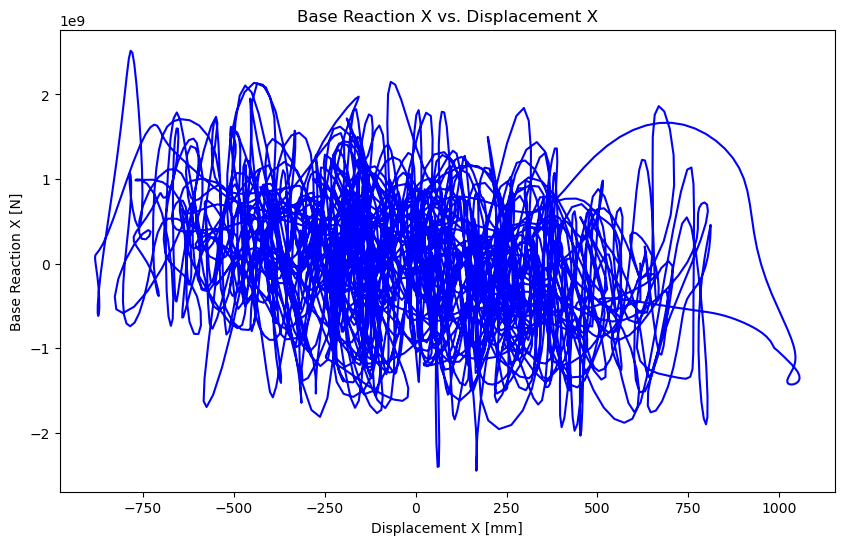

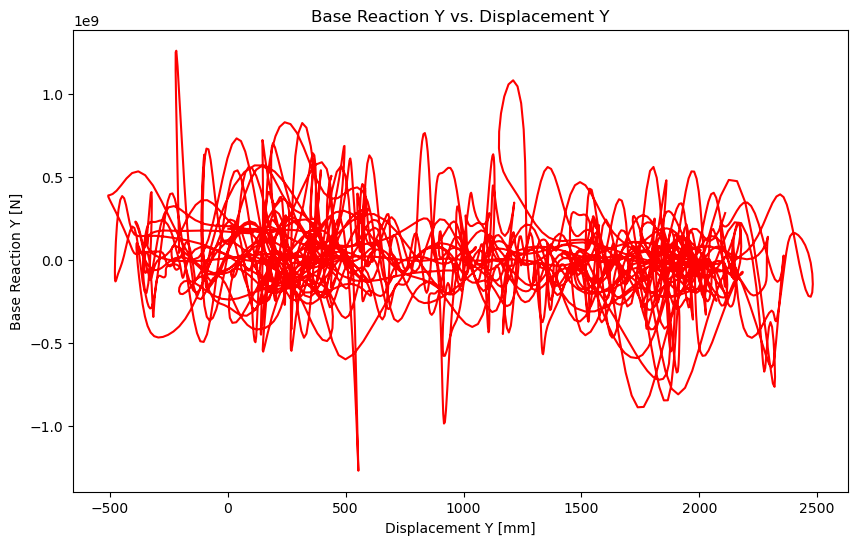

In [21]:
# Plot undamped results
plot_shapes(initial_coords, DISPLACEMENTS_undamped)
plot_reactions(DISP_X_undamped, BASE_REACTION_X_undamped, DISP_Y_undamped, BASE_REACTION_Y_undamped)

In [22]:
def HISROGRAM_BOXPLOT(X, HISTO_COLOR, LABEL):
    import numpy as np
    import matplotlib.pyplot as plt
    X = np.array(X)
    print("-------------------------")
    from scipy.stats import skew, kurtosis
    MINIMUM = np.min(X)
    MAXIMUM = np.max(X)
    #MODE = max(set(X), key=list(X).count)
    MEDIAN = np.quantile(X, .50)#q2
    MEAN = np.mean(X)
    STD = np.std(X)
    q1 = np.quantile(X, .25)
    q3 = np.quantile(X, .75)
    SKEW = skew(X)
    KURT = kurtosis(X)
    #SKEW = (MEAN - MODE) / STD
    #KURT = (np.mean((X - MEAN)**4) / STD**4)
    # Estimate confidence intervals of the output variable
    lower_bound = np.quantile(X, .05)
    upper_bound = np.quantile(X, .95)
    print("Box-Chart Datas: ")
    print(f'Minimum: {MINIMUM:.4e}')
    print(f'First quartile: {q1:.4e}')
    #print(f'Mode: {MODE:.4e}')
    print(f'Median: {MEDIAN:.4e}')
    print(f'Mean: {MEAN:.4e}')
    print(f'Std: {STD:.4e}')
    print(f'Third quartile: {q3:.4e}')
    print(f'Maximum: {MAXIMUM :.4e}')
    print(f'Skewness: {skew(X) :.4e}')
    print(f'kurtosis: {kurtosis(X) :.4e}')
    print(f"90% Confidence Interval: ({lower_bound:.4e}, {upper_bound:.4e})")
    print("-------------------------")

    plt.figure(figsize=(10,6))
    # Plot histogram of data
    count, bins, ignored = plt.hist(X, bins=100, color=HISTO_COLOR, density=True, align='mid')#, edgecolor="black"
    
    # Plot lognormal PDF
    x = np.linspace(min(bins), max(bins), 10000)
    pdf = (np.exp(-(x - MEAN)**2 / (2 * STD**2)) / (STD * np.sqrt(2 * np.pi)))
    plt.plot(x, pdf, linewidth=2, color='r', label="Normal PDF")
    
    # Plot vertical lines for risk measures
    plt.axvline(q1, color="black", linestyle="--", label=f"Quantile 0.25: {q1:.4e}")
    plt.axvline(MEDIAN, color="green", linestyle="--", label=f"Median: {MEDIAN:.4e}")
    plt.axvline(q3, color="black", linestyle="--", label=f"Quantile 0.75: {q3:.4e}")
    #plt.axvline(MODE, color="purple", linestyle="--", label=f"Mode: {MODE:.4e}")
    plt.axvline(MEAN, color="red", linestyle="--", label=f"Mean: {MEAN:.4e}")
    plt.axvline(MEAN-STD, color="blue", linestyle="--", label=f"Mean-Std: {MEAN-STD:.4e}")
    plt.axvline(MEAN+STD, color="blue", linestyle="--", label=f"Mean+Std: {MEAN+STD:.4e}")
    plt.xlabel(LABEL)
    plt.ylabel("Frequency")
    prob = np.sum(X > 0) / len(X)
    plt.title(f"Histogram - Probability of Positive {LABEL} is {100*prob:.2f} %")
    plt.legend()
    #plt.grid()
    plt.show()

    #Plot boxplot with outliers
    plt.figure(figsize=(10,6))
    plt.boxplot(X, vert=0)
    # Write the quartile data on the chart
    plt.text(q1, 1.05, f" Q1: {q1:.4e}")
    plt.text(MEDIAN, 1.1, f" Q2: {MEDIAN:.4e}")
    plt.text(q3, 1.05, f" Q3: {q3:.4e}")
    #plt.text(MODE, 1.15, f" Mode: {MODE:.4e}")
    
    #plt.text(MEAN, 0.9, f" Mean: {MEAN:.4e}")
    #plt.text(MEAN-STD, 0.9, f" Mean-Std: {MEAN-STD:.4e}")
    #plt.text(MEAN+STD, 0.9, f" Mean+Std: {MEAN+STD:.4e}")
    plt.scatter(MEAN, 1, color="red", marker="+", s=200, label=f"Mean: {MEAN:.4e}")
    plt.scatter(MEAN-STD, 1, color="green", marker="X", s=200, label=f"Mean-Std: {MEAN-STD:.4e}")
    plt.scatter(MEAN+STD, 1, color="blue", marker="*", s=200, label=f"Mean+Std:  {MEAN+STD:.4e}")
    plt.xlabel(LABEL)
    plt.ylabel("Data")
    plt.title(f"Boxplot of {LABEL}")
    plt.legend()
    plt.grid()
    plt.show()
# ----------------------------------------------- 
def HISTOGRAM_BOXPLOT_PLOTLY( DATA, XLABEL='X', TITLE='A', COLOR='cyan'):
    # Plotting histogram and boxplot
    import plotly.express as px
    fig = px.histogram(x=DATA, marginal="box", color_discrete_sequence=[COLOR])
    fig.update_layout(title=TITLE, xaxis_title=XLABEL, yaxis_title="Frequency")
    fig.show()

-------------------------
Box-Chart Datas: 
Minimum: -8.8200e+02
First quartile: -2.7079e+02
Median: -7.9737e+00
Mean: -4.4698e+00
Std: 3.7508e+02
Third quartile: 2.6380e+02
Maximum: 1.0557e+03
Skewness: 1.1076e-01
kurtosis: -4.2244e-01
90% Confidence Interval: (-6.1978e+02, 6.1751e+02)
-------------------------


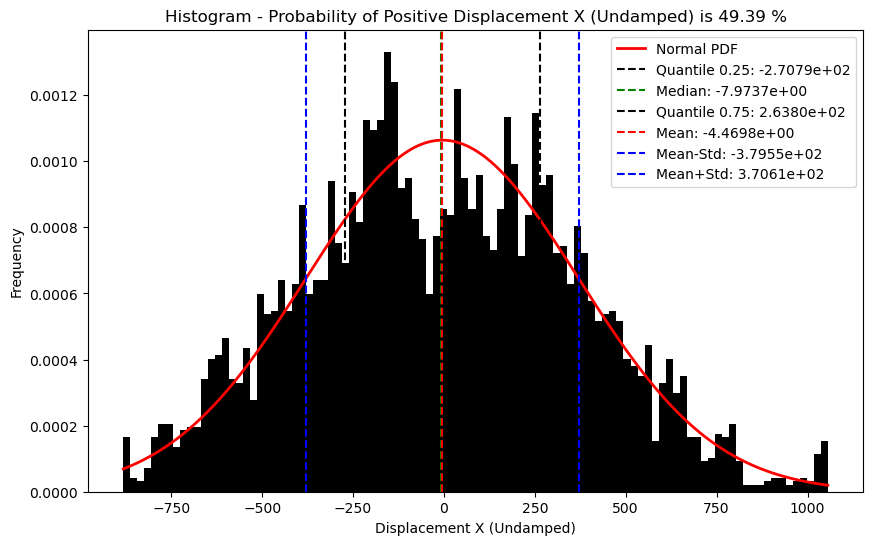

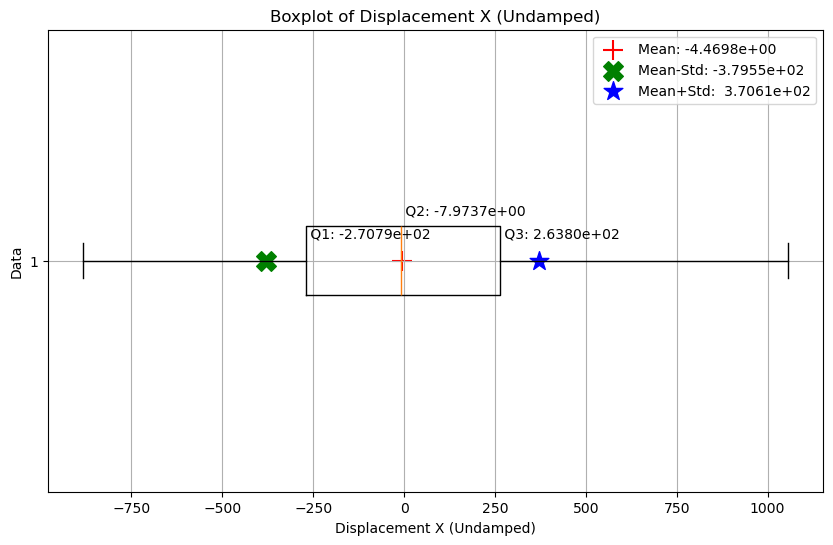

-------------------------
Box-Chart Datas: 
Minimum: -1.5912e+03
First quartile: -3.6314e+02
Median: 8.5778e+01
Mean: 7.6346e+01
Std: 5.6086e+02
Third quartile: 5.0232e+02
Maximum: 1.5870e+03
Skewness: -6.3644e-02
kurtosis: -5.1354e-01
90% Confidence Interval: (-8.6030e+02, 9.3185e+02)
-------------------------


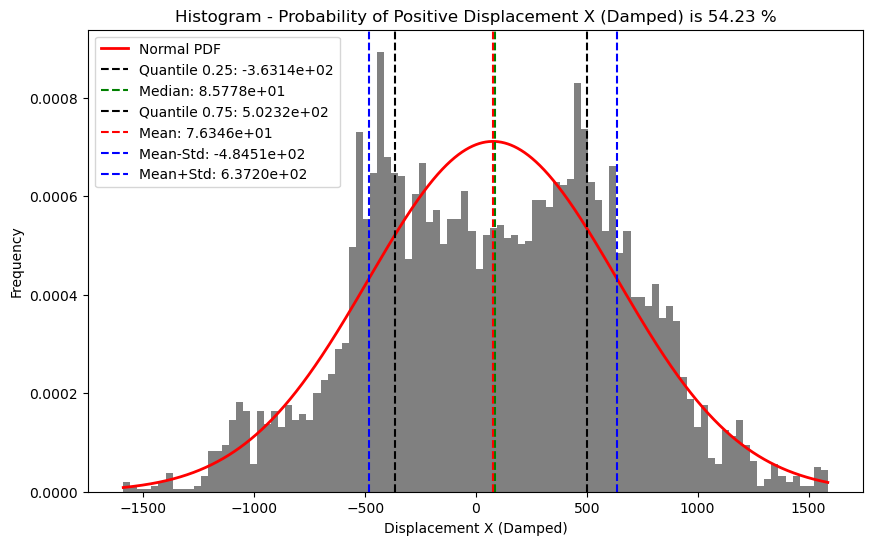

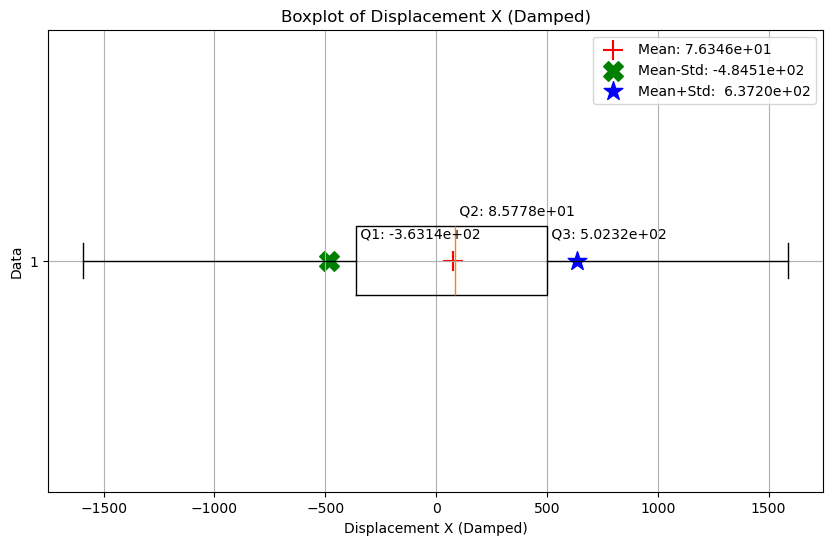

In [31]:
HISROGRAM_BOXPLOT(DISP_X_undamped, HISTO_COLOR='black', LABEL='Displacement X (Undamped)')
HISROGRAM_BOXPLOT(DISP_X_damped, HISTO_COLOR='grey', LABEL='Displacement X (Damped)')
#HISTOGRAM_BOXPLOT_PLOTLY(DISP_X_undamped, XLABEL='Displacement X (Undamped)', TITLE='Displacement X (Undamped)', COLOR='black')
#HISTOGRAM_BOXPLOT_PLOTLY(DISP_X_damped, XLABEL='Displacement X (Damped)', TITLE='Displacement X (Damped)', COLOR='grey')

-------------------------
Box-Chart Datas: 
Minimum: -5.0680e+02
First quartile: 3.0519e+02
Median: 1.0019e+03
Mean: 9.8458e+02
Std: 7.7901e+02
Third quartile: 1.7386e+03
Maximum: 2.4812e+03
Skewness: -3.5038e-02
kurtosis: -1.2825e+00
90% Confidence Interval: (-2.4386e+02, 2.1099e+03)
-------------------------


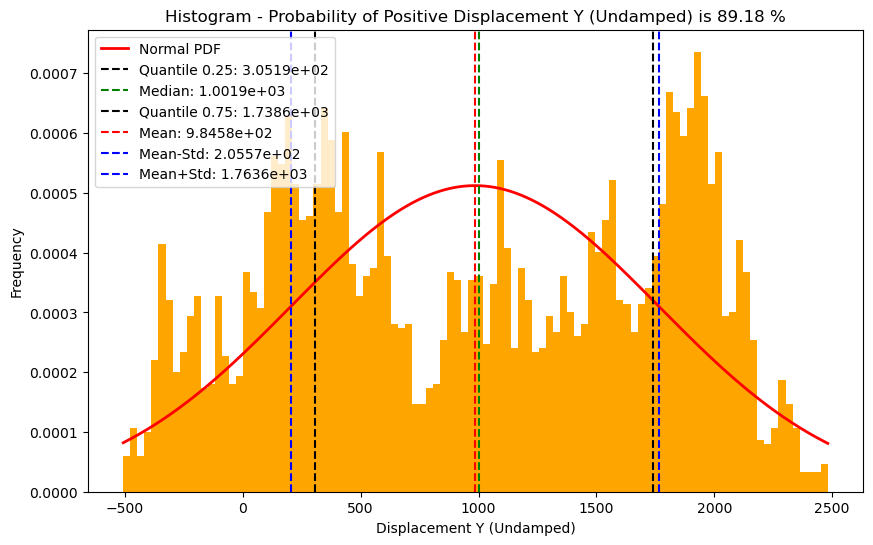

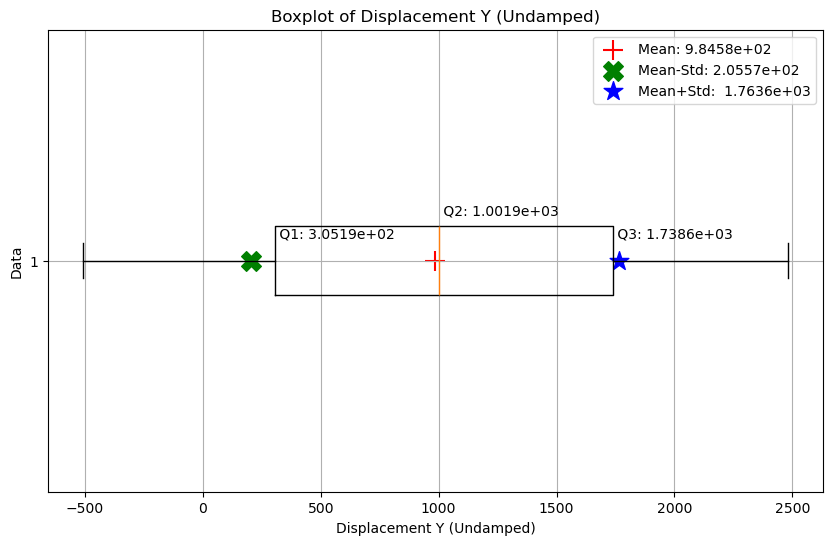

-------------------------
Box-Chart Datas: 
Minimum: -2.0731e+03
First quartile: 1.3267e+02
Median: 1.4193e+03
Mean: 1.2397e+03
Std: 1.4599e+03
Third quartile: 2.3705e+03
Maximum: 4.7733e+03
Skewness: -2.0349e-01
kurtosis: -6.2274e-01
90% Confidence Interval: (-1.4367e+03, 3.4910e+03)
-------------------------


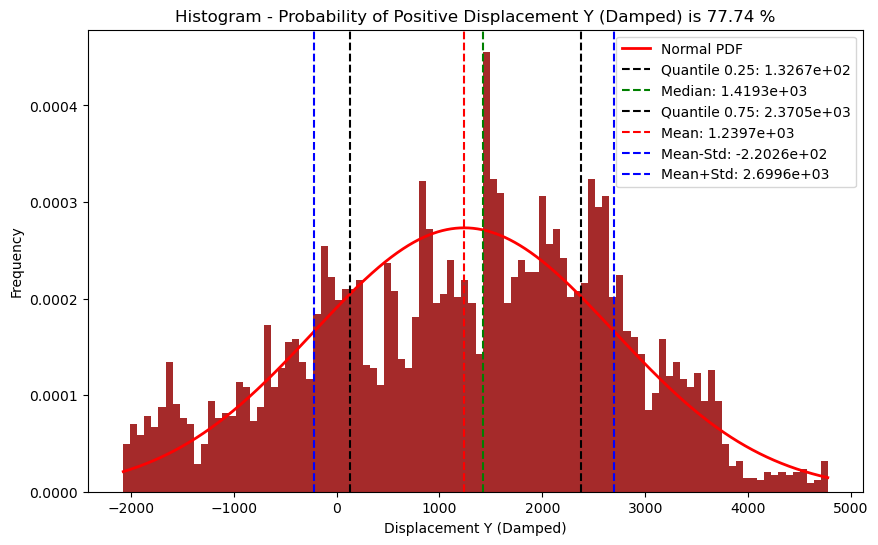

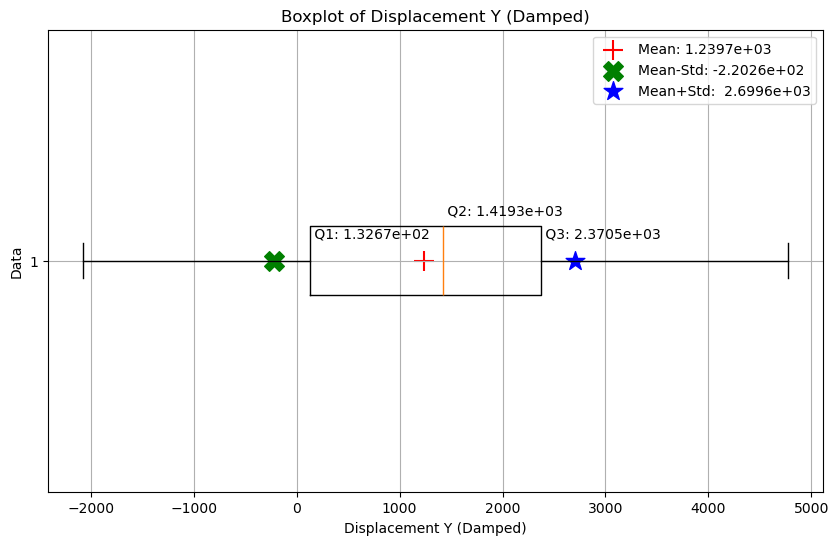

In [32]:
HISROGRAM_BOXPLOT(DISP_Y_undamped, HISTO_COLOR='orange', LABEL='Displacement Y (Undamped)')
HISROGRAM_BOXPLOT(DISP_Y_damped, HISTO_COLOR='brown', LABEL='Displacement Y (Damped)')
#HISTOGRAM_BOXPLOT_PLOTLY(DISP_Y_undamped, XLABEL='Displacement Y (Undamped)', TITLE='Displacement Y (Undamped)', COLOR='orange')
#HISTOGRAM_BOXPLOT_PLOTLY(DISP_Y_damped, XLABEL='Displacement Y (Damped)', TITLE='Displacement Y (Damped)', COLOR='brown')

-------------------------
Box-Chart Datas: 
Minimum: -5.2261e+03
First quartile: -9.7251e+02
Median: 6.9651e+01
Mean: 4.2248e+01
Std: 1.6077e+03
Third quartile: 1.0676e+03
Maximum: 5.4521e+03
Skewness: -2.7785e-02
kurtosis: 3.0273e-01
90% Confidence Interval: (-2.5773e+03, 2.6789e+03)
-------------------------


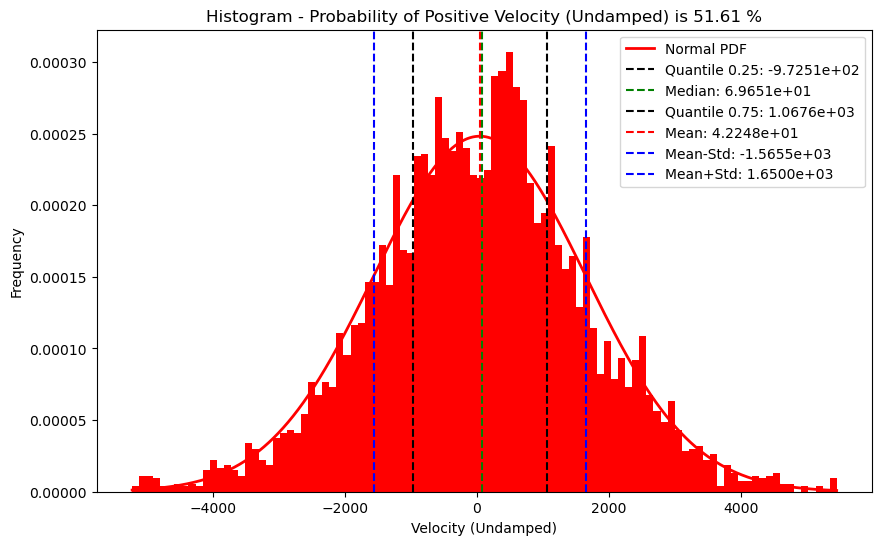

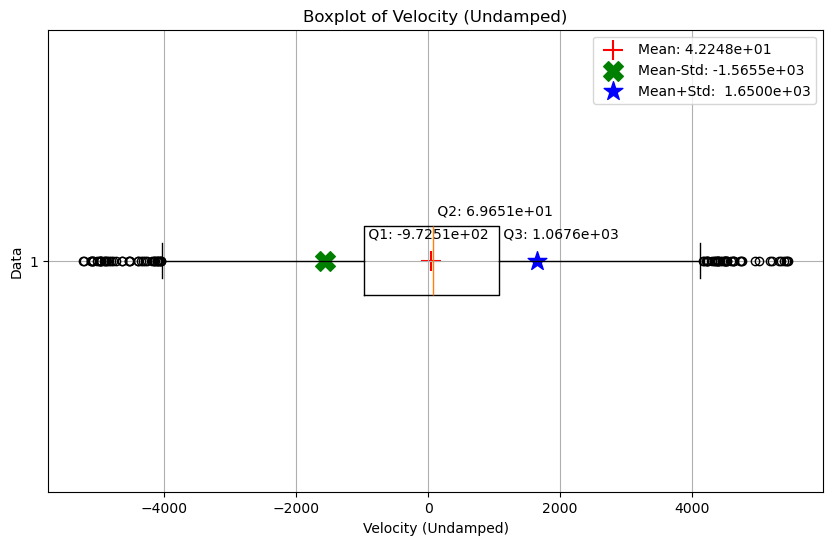

-------------------------
Box-Chart Datas: 
Minimum: -9.4305e+03
First quartile: -1.9069e+03
Median: -8.2274e+01
Mean: -3.1504e+01
Std: 2.9969e+03
Third quartile: 1.9113e+03
Maximum: 9.9720e+03
Skewness: -2.8378e-02
kurtosis: 8.9536e-02
90% Confidence Interval: (-5.0629e+03, 4.9644e+03)
-------------------------


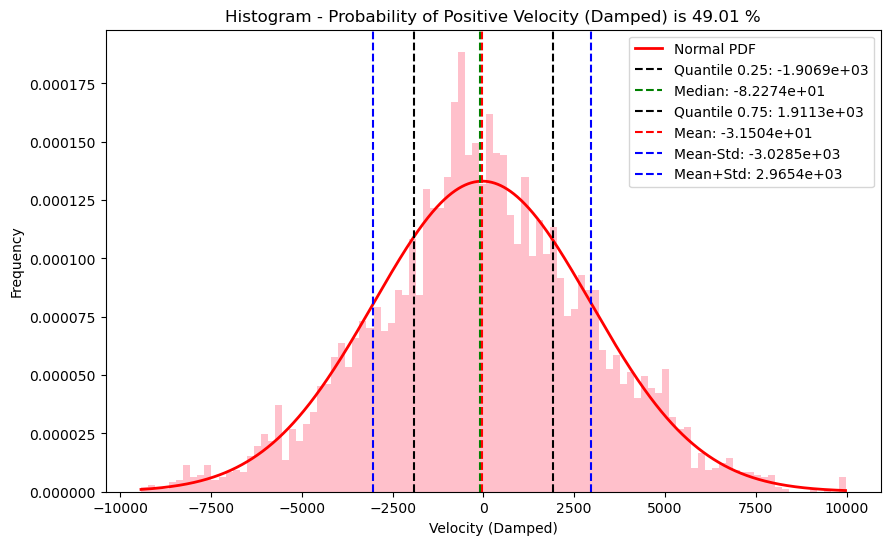

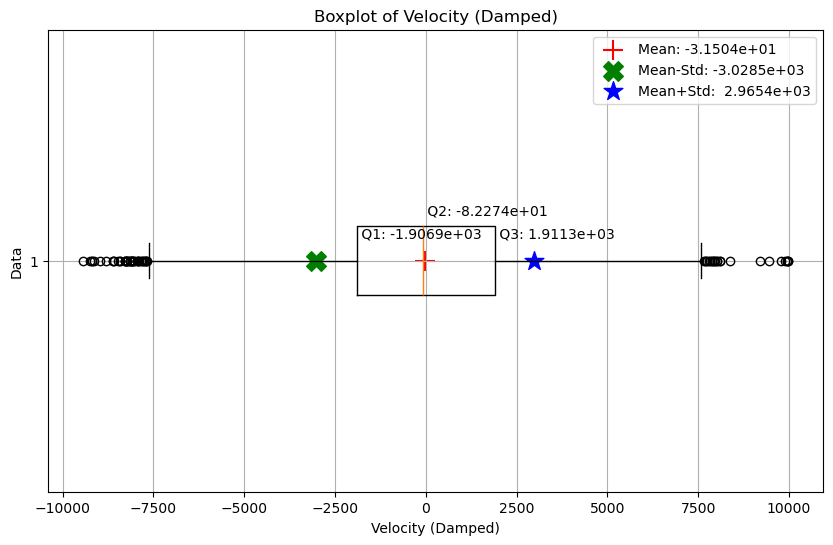

In [33]:
HISROGRAM_BOXPLOT(VELOCITY_undamped, HISTO_COLOR='red', LABEL='Velocity (Undamped)')
HISROGRAM_BOXPLOT(VELOCITY_damped, HISTO_COLOR='pink', LABEL='Velocity (Damped)')
#HISTOGRAM_BOXPLOT_PLOTLY(VELOCITY_undamped, XLABEL='Velocity (Undamped)', TITLE='Velocity (Undamped)', COLOR='red')
#HISTOGRAM_BOXPLOT_PLOTLY(VELOCITY_damped, XLABEL='Velocity (Damped)', TITLE='Velocity (Damped)', COLOR='pink')

-------------------------
Box-Chart Datas: 
Minimum: -1.0943e+05
First quartile: -1.0097e+04
Median: 2.6104e+02
Mean: 1.6787e+01
Std: 2.1775e+04
Third quartile: 1.0740e+04
Maximum: 1.0414e+05
Skewness: -7.8594e-02
kurtosis: 2.4479e+00
90% Confidence Interval: (-3.6803e+04, 3.5566e+04)
-------------------------


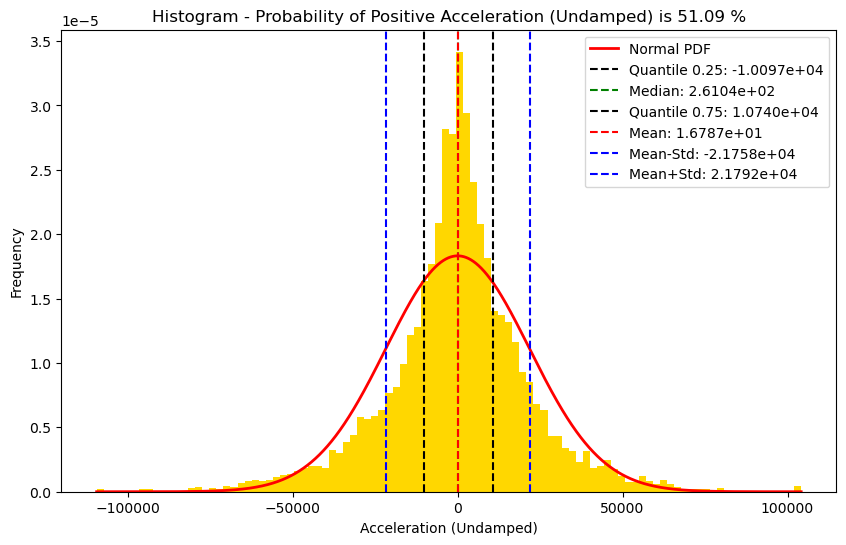

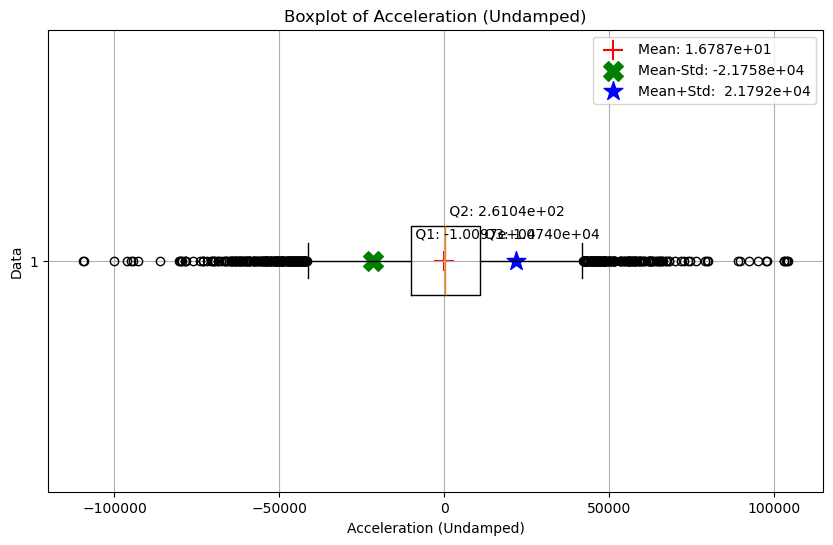

-------------------------
Box-Chart Datas: 
Minimum: -2.6137e+05
First quartile: -2.5045e+04
Median: 1.4093e+03
Mean: 7.3332e+01
Std: 5.2561e+04
Third quartile: 2.4652e+04
Maximum: 2.4665e+05
Skewness: -1.2018e-01
kurtosis: 2.3742e+00
90% Confidence Interval: (-8.7129e+04, 8.6345e+04)
-------------------------


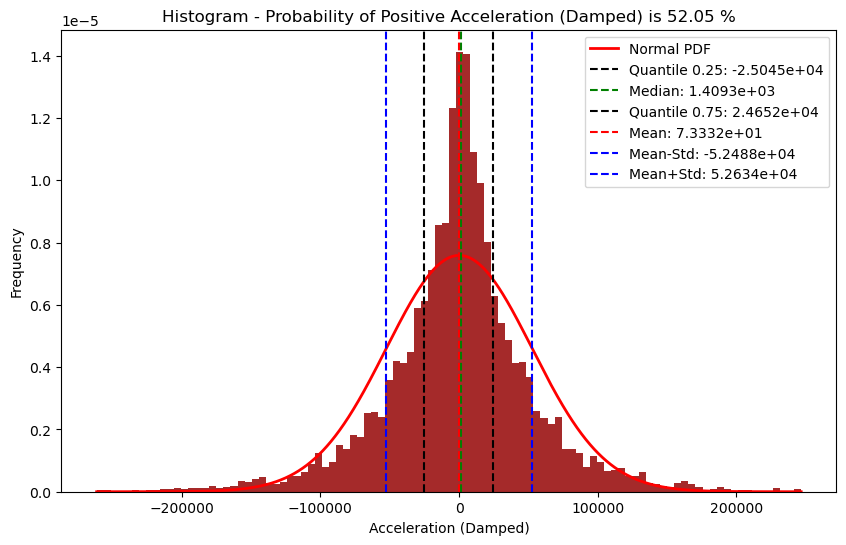

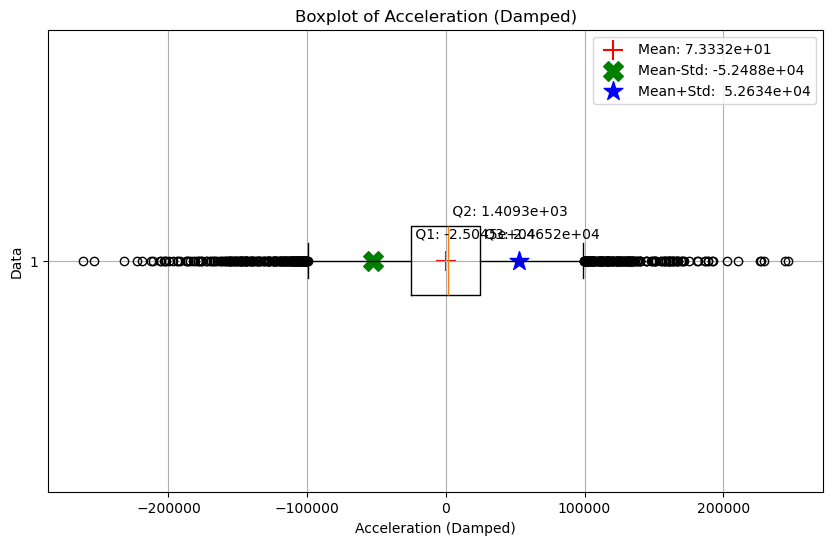

In [34]:
HISROGRAM_BOXPLOT(ACCELERATION_undamped, HISTO_COLOR='gold', LABEL='Acceleration (Undamped)')
HISROGRAM_BOXPLOT(ACCELERATION_damped, HISTO_COLOR='brown', LABEL='Acceleration (Damped)')
#HISTOGRAM_BOXPLOT_PLOTLY(ACCELERATION_undamped, XLABEL='Acceleration (Undamped)', TITLE='Acceleration (Undamped)', COLOR='gold')
#HISTOGRAM_BOXPLOT_PLOTLY(ACCELERATION_damped, XLABEL='Acceleration (Damped)', TITLE='Acceleration (Damped)', COLOR='brown')

-------------------------
Box-Chart Datas: 
Minimum: -2.4467e+09
First quartile: -5.2477e+08
Median: 1.1233e+07
Mean: -2.0341e+06
Std: 7.5971e+08
Third quartile: 5.2979e+08
Maximum: 2.5164e+09
Skewness: 1.2706e-02
kurtosis: -2.3883e-01
90% Confidence Interval: (-1.2687e+09, 1.2521e+09)
-------------------------


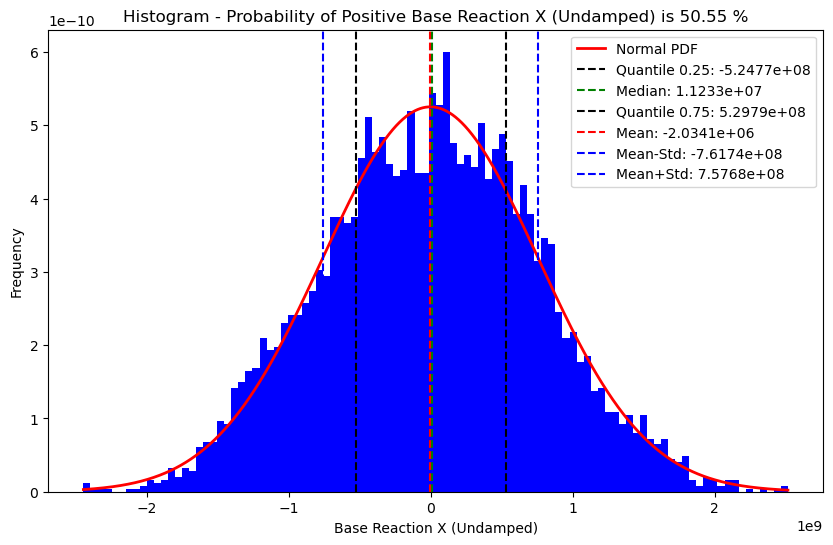

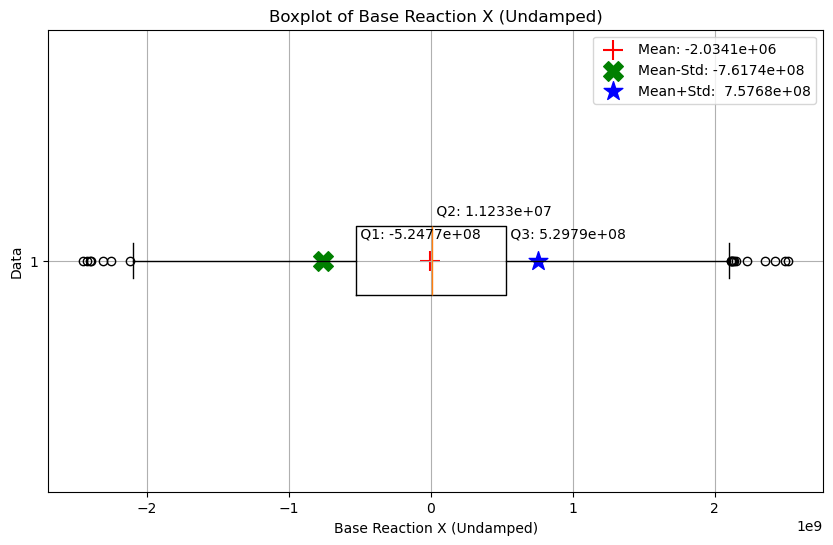

-------------------------
Box-Chart Datas: 
Minimum: -4.0228e+09
First quartile: -8.5620e+08
Median: -1.6772e+07
Mean: -3.4555e+06
Std: 1.3168e+09
Third quartile: 8.6166e+08
Maximum: 4.8323e+09
Skewness: 1.0752e-01
kurtosis: 2.1594e-01
90% Confidence Interval: (-2.2036e+09, 2.1727e+09)
-------------------------


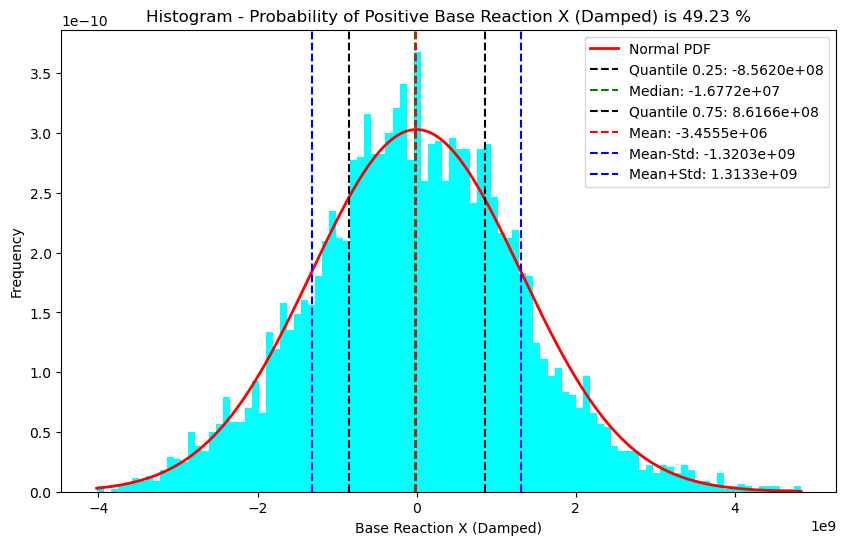

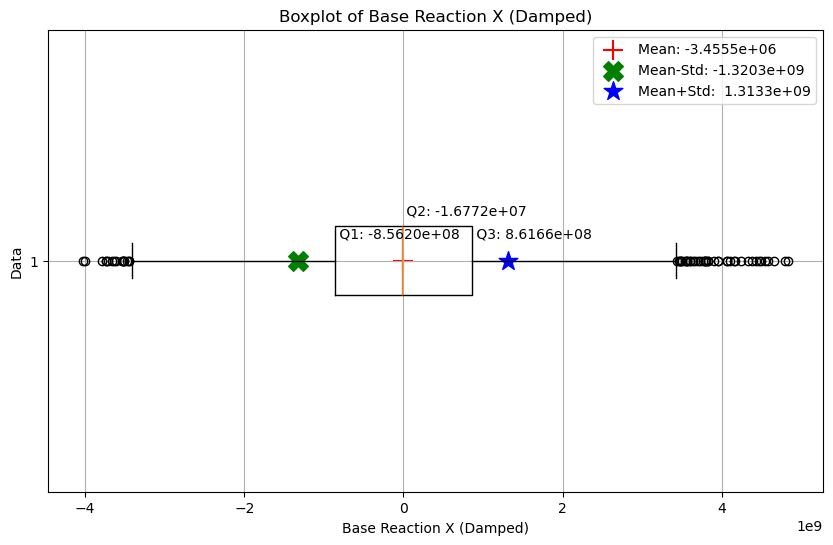

In [35]:
HISROGRAM_BOXPLOT(BASE_REACTION_X_undamped, HISTO_COLOR='blue', LABEL='Base Reaction X (Undamped)')
HISROGRAM_BOXPLOT(BASE_REACTION_X_damped, HISTO_COLOR='cyan', LABEL='Base Reaction X (Damped)')
#HISTOGRAM_BOXPLOT_PLOTLY(BASE_REACTION_X_undamped, XLABEL='Base Reaction X (Undamped)', TITLE='Base Reaction X (Undamped)', COLOR='blue')
#HISTOGRAM_BOXPLOT_PLOTLY(BASE_REACTION_X_damped, XLABEL='Base Reaction X (Damped)', TITLE='Base Reaction X (Damped)', COLOR='cyan')

-------------------------
Box-Chart Datas: 
Minimum: -1.2698e+09
First quartile: -1.2176e+08
Median: -6.5294e+06
Mean: 1.3309e+06
Std: 2.3106e+08
Third quartile: 1.1519e+08
Maximum: 1.2578e+09
Skewness: 1.2928e-01
kurtosis: 2.8227e+00
90% Confidence Interval: (-3.6076e+08, 3.9602e+08)
-------------------------


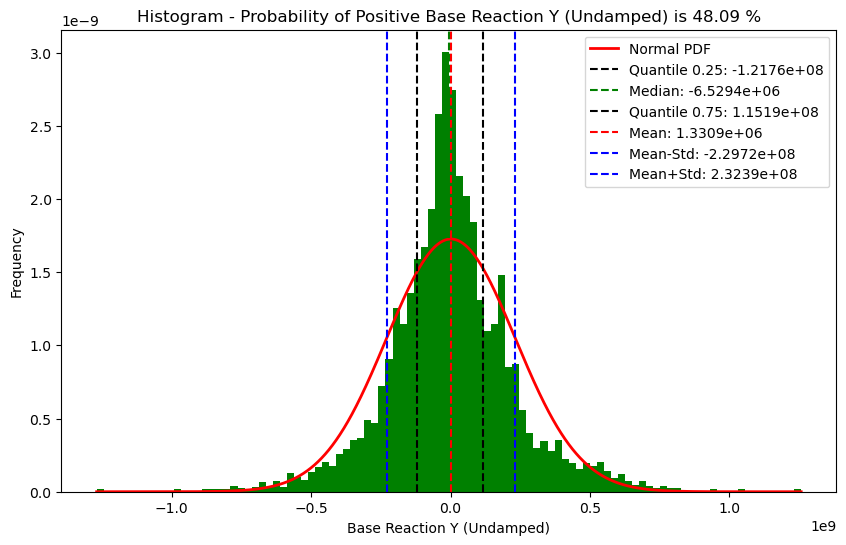

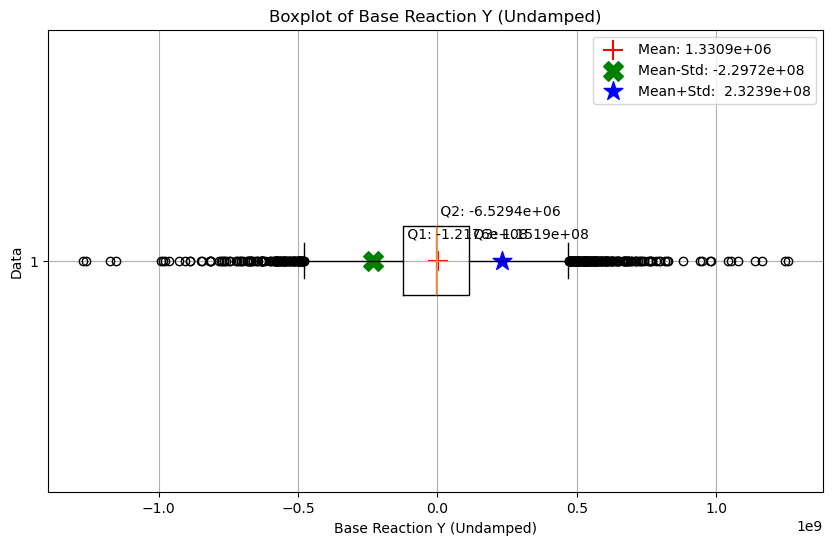

-------------------------
Box-Chart Datas: 
Minimum: -2.9728e+09
First quartile: -3.0085e+08
Median: -1.3304e+07
Mean: -2.1276e+06
Std: 6.0332e+08
Third quartile: 3.0888e+08
Maximum: 2.8597e+09
Skewness: 8.0655e-02
kurtosis: 2.4432e+00
90% Confidence Interval: (-9.8636e+08, 9.7949e+08)
-------------------------


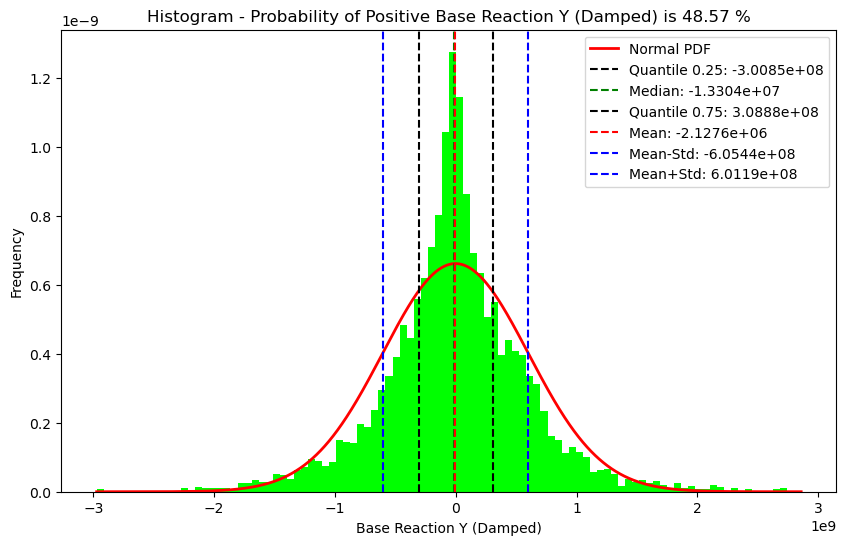

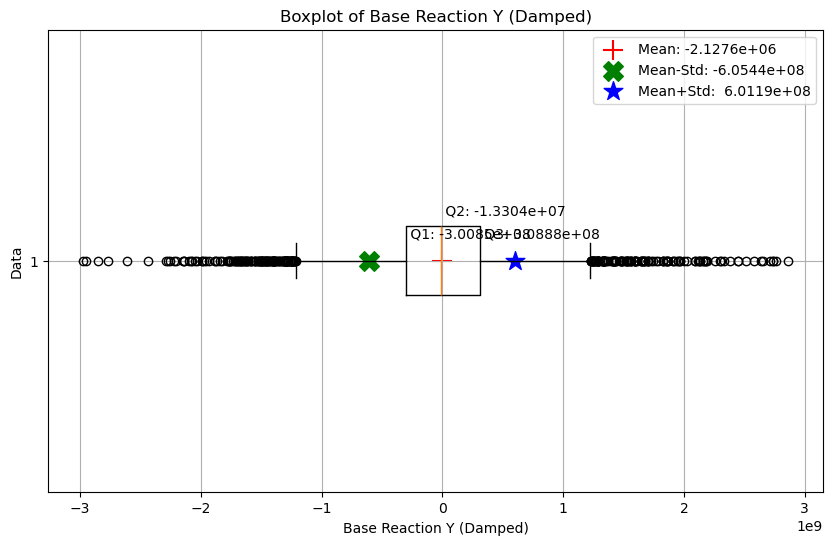

In [36]:
HISROGRAM_BOXPLOT(BASE_REACTION_Y_undamped, HISTO_COLOR='green', LABEL='Base Reaction Y (Undamped)')
HISROGRAM_BOXPLOT(BASE_REACTION_Y_damped, HISTO_COLOR='lime', LABEL='Base Reaction Y (Damped)')
#HISTOGRAM_BOXPLOT_PLOTLY(BASE_REACTION_Y_undamped, XLABEL='Base Reaction Y (Undamped)', TITLE='Base Reaction Y (Undamped)', COLOR='green')
#HISTOGRAM_BOXPLOT_PLOTLY(BASE_REACTION_Y_damped, XLABEL='Base Reaction Y (Damped)', TITLE='Base Reaction Y (Damped)', COLOR='lime')

In [10]:
#          ############################################################################################
#          #                                          IN THE NAME OF ALLAH                            #
#          #                          DYNAMIC ANALYSIS OF CABLE SUSPENSION BRIDGE 02                  #
#          #------------------------------------------------------------------------------------------#
#          #                  THIS PROGRAM WRITTEN BY SALAR DELAVAR GHASHGHAEI (QASHQAI)              #
#          #                            EMAIL: salar.d.ghashghaei@gmail.com                           #
#          ############################################################################################

In [14]:
# -------------------
#   DYNAMIC ANALYSIS
# -------------------
def DYNAMIC_ANALYSIS(damping, damping_ratio, LINEAR, periodTF, duration, dt, TOTAL_MASS, L, H1, H2, arc_depth, E_cable, Cable_Dia_01, Cable_Dia_02, Cable_Dia_03, num_nodes, MAX_ITERATIONS, TOLERANCE):
    import openseespy.opensees as ops
    import numpy as np
    import matplotlib.pyplot as plt
    
    #GMfact = 9810               # standard acceleration of gravity or standard acceleration 
    GMfact = 1;
    iv0 = 0.0                   # [mm/s] Initial velocity applied to the node
    st_iv0 = 0.0                # [s] Initial velocity applied starting time
    KE = 1000;                  # [N/mm] Lateral column Effective Stiffness
    A_cable_01 = (np.pi * Cable_Dia_01 **2) / 4  # [mm^2] Horizontal Longitudinal Cable Area Bottom
    A_cable_02 = (np.pi * Cable_Dia_02 **2) / 4  # [mm^2] Horizontal Longitudinal Cable Area Top
    A_cable_03 = (np.pi * Cable_Dia_03 **2) / 4  # [mm^2] Vertical Longitudinal Cable Area Top
    
    # Define model builder
    ops.wipe()
    ops.model('basic', '-ndm', 2, '-ndf', 2)
    dx = L / (num_nodes - 1)
    MASS = TOTAL_MASS / num_nodes
    # Create nodes
    # Create nodes
    for i in range(num_nodes):
        X = i * dx
        Y1 = H1 - arc_depth * np.sin(np.pi * X / L)
        Y2 = Y1 - H2
        ops.node(i + 1, X, Y1)
        ops.node(num_nodes + i + 1, i * dx, Y2)
        # Define mass
        ops.mass(num_nodes + i + 1, MASS, MASS, 0)

    # Define boundary conditions (fixed at both ends)
    ops.fix(1, 1, 1)              # TOP CABLE
    ops.fix(num_nodes, 1, 1)      # TOP CABLE
    ops.fix(num_nodes + 1, 1, 1)  # BOTTOM CABLE
    ops.fix(2 * num_nodes, 1, 1)  # BOTTOM CABLE
    
    # Define material properties
    if LINEAR == True:
        ops.uniaxialMaterial('Elastic', 1, E_cable)
        #                                  TENSION    COMPRESSION
        #ops.uniaxialMaterial('Elastic', 1, E_cable, 0, 0.5 * E_cable)
    if LINEAR == False:
        Fy_cable = 355   # [N/mm^2] Yield strength of the cable
        b0 = 0.01
        ops.uniaxialMaterial('Steel01', 1, Fy_cable, E_cable, b0)
 
    # Define truss elements
    for i in range(num_nodes - 1):
        ops.element('corotTruss', i + 1, i + 1, i + 2, A_cable_02, 1)  # Top Cable element
        ops.element('corotTruss', num_nodes + i + 1, num_nodes + i + 1, num_nodes + i + 2, A_cable_01, 1)  # Bottom Cable Element

    # Connect each node of the cable with the corresponding node of the deck using truss elements
    for i in range(num_nodes):
        ops.element('corotTruss', 2 * num_nodes + i + 1, i + 1, num_nodes + i + 1, A_cable_03, 1) # Vertical Cable Element
    
    #mid_node = num_nodes // 2 + 1
    mid_node = int(num_nodes + 0.5 * num_nodes)

    # Dynamic analysis setup
    ops.constraints('Transformation')
    ops.numberer('RCM')
    ops.system('UmfPack')
    ops.test('EnergyIncr', TOLERANCE, MAX_ITERATIONS)
    #ops.integrator('CentralDifference')
    ops.integrator('HHT', 0.9)
    #ops.integrator('Newmark', 0.5, 0.25)
    ops.algorithm('ModifiedNewton')

    # Define analysis type
    ops.analysis('Transient')
    
    # Define time series for input motion (Acceleration time history)
    ops.timeSeries('Path', 1, '-dt', 0.01, '-filePath', 'OPENSEES_SPRING_SEISMIC_01.txt', '-factor', GMfact, '-startTime', st_iv0) # SEISMIC-X
    ops.timeSeries('Path', 2, '-dt', 0.01, '-filePath', 'OPENSEES_SPRING_SEISMIC_02.txt', '-factor', GMfact) # SEISMIC-Y

    # Define load patterns
    # pattern UniformExcitation $patternTag $dof -accel $tsTag <-vel0 $vel0> <-fact $cFact>
    ops.pattern('UniformExcitation', 1, 1, '-accel', 1, '-vel0', iv0, '-fact', 1.0) # SEISMIC-X
    ops.pattern('UniformExcitation', 2, 2, '-accel', 2)                             # SEISMIC-Y
    
    # Perform eigenvalue analysis to determine modal periods
    if periodTF == True:
        eigenvalues01 = ops.eigen('-genBandArpack', 1) # eigenvalue mode 1
        #eigenvalues01 = ops.eigen('-fullGenLapack', 1) # eigenvalue mode 1
        #eigenvalues01 = ops.eigen('-symmBandLapack', 1) # eigenvalue mode 1
        #Omega = np.power(eigenvalues01, 0.5)     
        #Omega = np.power(max(min(eigenvalues01), min(eigenvalues02), min(eigenvalues03)), 0.5)
        Omega = np.power(min(eigenvalues01), 0.5)
        modal_period = 2 * np.pi / np.sqrt(Omega)  # [Second]  
        frequency = 1 / modal_period               # [Hertz]

    if periodTF == False:
        modal_period = 0.0            # [Second]  
        frequency = 0.0               # [Hertz]

    if damping == True:
        # Calculate Rayleigh damping factors
        omega1 = np.sqrt(KE / TOTAL_MASS)
        omega2 = 2 * omega1  # Just an assumption for two modes
        a0 = damping_ratio * (2 * omega1 * omega2) / (omega1 + omega2)
        a1 = damping_ratio * 2 / (omega1 + omega2)
        # Apply Rayleigh damping
        ops.rayleigh(a0, a1, 0, 0)

    # OUTPUT DATA
    ops.recorder('Node', '-file', f"{SALAR_DIR}DTH_DYN.txt",'-time', '-node', mid_node, '-dof', 1,2, 'disp')# Displacement Time History
    ops.recorder('Node', '-file', f"{SALAR_DIR}VTH_DYN.txt",'-time', '-node', mid_node, '-dof', 1,2, 'vel')  # Velocity Time History
    ops.recorder('Node', '-file', f"{SALAR_DIR}ATH_DYN.txt",'-time', '-node', mid_node, '-dof', 1,2, 'accel') # Acceleration Time History
    ops.recorder('Node', '-file', f"{SALAR_DIR}BTH_DYN_01.txt",'-time', '-node', 1, '-dof', 1,2, 'reaction')# Base Shear Time History
    ops.recorder('Node', '-file', f"{SALAR_DIR}BTH_DYN_02.txt",'-time', '-node', num_nodes, '-dof', 1,2, 'reaction')# Base Shear Time History
    ops.recorder('Node', '-file', f"{SALAR_DIR}BTH_DYN_03.txt",'-time', '-node', num_nodes + 1, '-dof', 1,2, 'reaction')# Base Shear Time History
    ops.recorder('Node', '-file', f"{SALAR_DIR}BTH_DYN_04.txt",'-time', '-node', 2*num_nodes, '-dof', 1,2, 'reaction')# Base Shear

    DISPLACEMENTS = []
    DISP_X , DISP_Y, VELOCITY, ACCELERATION = [], [], [], []
    BASE_REACTION_X, BASE_REACTION_Y = [], []

    stable = 0
    current_time = 0.0
     # Perform the analysis with increments
    while stable == 0 and current_time < duration:
        OK = ops.analyze(1, dt)
        ANALYSIS(OK, 1, TOLERANCE, MAX_ITERATIONS)
        current_time = ops.getTime()
        DISPLACEMENTS.append([ops.nodeDisp(j + 1) for j in range(num_nodes * 2)])
        DISP_X.append(ops.nodeDisp(mid_node, 1))
        DISP_Y.append(ops.nodeDisp(mid_node, 2))
        VELOCITY.append(ops.nodeVel(mid_node, 2))
        ACCELERATION.append(ops.nodeAccel(mid_node, 2))
        x1 = ops.nodeResponse(1, 1, 6)
        x2 = ops.nodeResponse(num_nodes, 1, 6)
        x3 = ops.nodeResponse(num_nodes + 1, 1, 6)
        x4 = ops.nodeResponse(2*num_nodes, 1, 6)
        y1 = ops.nodeResponse(1, 2, 6)
        y2 = ops.nodeResponse(num_nodes, 2, 6)
        y3 = ops.nodeResponse(num_nodes + 1, 2, 6)
        y4 = ops.nodeResponse(2*num_nodes, 2, 6)
        BASE_REACTION_X.append(x1+x2+x3+x4) # CABLE REACION-X
        BASE_REACTION_Y.append(y1+y2+y3+y4) # CABLE REACION-Y
        KE =  np.abs(BASE_REACTION_Y[-1] / DISP_Y[-1]) # Effective Lateral Stiffness
        ##print(f'time: {current_time}')
    
    # Get initial and final node coordinates for plotting
    initial_coords = np.array([ops.nodeCoord(i + 1) for i in range(num_nodes * 2)])
    deformed_coords = initial_coords + np.array(DISPLACEMENTS[-1])
    
    # Output all unconstrained node displacements
    for i in range(num_nodes * 2):
        disp = ops.nodeDisp(i + 1)
        print(f"Node {i + 1}: X Displacement = {disp[0]}, Y Displacement = {disp[1]}")
        
    ops.wipe()
    print("Period: ", modal_period)
    print("Frequency: ", frequency)
    if damping == False:
        print(f' Undamping Structure Dynamic Analysis Done.') 
    if damping == True:
        print(f' Damping Structure Dynamic Analysis Done.')  
    
    return initial_coords, deformed_coords, DISPLACEMENTS, VELOCITY, ACCELERATION, DISP_X, DISP_Y, BASE_REACTION_X, BASE_REACTION_Y

In [15]:
def plot_time_history(DISP_X_undamped, DISP_X_damped, DISP_Y_undamped, DISP_Y_damped, 
                      VELOCITY_undamped, VELOCITY_damped, ACCELERATION_undamped, ACCELERATION_damped, 
                      BASE_REACTION_X_undamped, BASE_REACTION_X_damped, BASE_REACTION_Y_undamped, BASE_REACTION_Y_damped):
    import matplotlib.pyplot as plt
    import numpy as np
    # Assuming you have 'time' array representing the time steps
    time = [i * dt for i in range(len(DISPLACEMENTS_undamped))]
    plt.figure(figsize=(14, 20))

    # Plot Displacements in X direction
    plt.subplot(6, 1, 1)
    P1 = DISP_X_undamped
    P2 = DISP_X_damped
    P11 = np.max(np.abs(P1))
    P22 = np.max(np.abs(P2))
    P3 = P11 / P22
    plt.plot(time, P1, color='black', label=f'Undamped X: {P11:.5e}')
    plt.plot(time, P2, color='red', label=f'Damped X: {P22:.5e}')
    plt.title(f'Displacement Time History (X direction) - Amplification Factor: {P3:.3f}')
    plt.xlabel('Time [s]')
    plt.ylabel('Displacement [m] (X direction)')
    plt.legend()

    # Plot Displacements in Y direction
    plt.subplot(6, 1, 2)
    P1 = DISP_Y_undamped
    P2 = DISP_Y_damped
    P11 = np.max(np.abs(P1))
    P22 = np.max(np.abs(P2))
    P3 = P11 / P22
    plt.plot(time, P1, color='black', label=f'Undamped Y: {P11:.5e}')
    plt.plot(time, P2, color='red', label=f'Damped Y: {P22:.5e}')
    plt.title(f'Displacement Time History (Y direction) - Amplification Factor: {P3:.3f}')
    plt.xlabel('Time [s]')
    plt.ylabel('Displacement [m] (Y direction)')
    plt.legend()

    # Plot Velocities
    plt.subplot(6, 1, 3)
    P1 = VELOCITY_undamped
    P2 = VELOCITY_damped
    P11 = np.max(np.abs(P1))
    P22 = np.max(np.abs(P2))
    P3 = P11 / P22
    plt.plot(time, P1, color='black', label=f'Undamped: {P11:.5e}')
    plt.plot(time, P2, color='red', label=f'Damped: {P22:.5e}')
    plt.title(f'Velocity Time History - Amplification Factor: {P3:.3f}')
    plt.xlabel('Time [s]')
    plt.ylabel('Velocity [m/s] (Y direction)')
    plt.legend()

    # Plot Accelerations
    plt.subplot(6, 1, 4)
    P1 = ACCELERATION_undamped
    P2 = ACCELERATION_damped
    P11 = np.max(np.abs(P1))
    P22 = np.max(np.abs(P2))
    P3 = P11 / P22
    plt.plot(time, P1, color='black', label=f'Undamped: {P11:.5e}')
    plt.plot(time, P2, color='red', label=f'Damped: {P22:.5e}')
    plt.title(f'Acceleration Time History - Amplification Factor: {P3:.3f}')
    plt.xlabel('Time [s]')
    plt.ylabel('Acceleration [m/s²] (Y direction)')
    plt.legend()

    # Plot Base Reactions in X direction
    plt.subplot(6, 1, 5)
    P1 = BASE_REACTION_X_undamped
    P2 = BASE_REACTION_X_damped
    P11 = np.max(np.abs(P1))
    P22 = np.max(np.abs(P2))
    P3 = P11 / P22
    plt.plot(time, P1, color='black', label=f'Undamped: {P11:.5e}')
    plt.plot(time, P2, color='red', label=f'Damped: {P22:.5e}')
    plt.title(f'Base Reaction Time History (X direction) - Amplification Factor: {P3:.3f}')
    plt.xlabel('Time [s]')
    plt.ylabel('Base Reaction [N] (X direction)')
    plt.legend()

    # Plot Base Reactions in Y direction
    plt.subplot(6, 1, 6)
    P1 = BASE_REACTION_Y_undamped
    P2 = BASE_REACTION_Y_damped
    P11 = np.max(np.abs(P1))
    P22 = np.max(np.abs(P2))
    P3 = P11 / P22
    plt.plot(time, P1, color='black', label=f'Undamped: {P11:.5e}')
    plt.plot(time, P2, color='red', label=f'Damped: {P22:.5e}')
    plt.title(f'Base Reaction Time History (Y direction) - Amplification Factor: {P3:.3f}')
    plt.xlabel('Time [s]')
    plt.ylabel('Base Reaction [N] (Y direction)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# -------------------
#   DYNAMIC ANALYSIS
# -------------------
# Parameters for the analysis
L = 50000.0         # [mm] Bridge span lentgh
H1 = 3500.0         # [mm] Height of Top Cable
H2 = 2000           # [mm] Height of Bottom Cable
arc_depth = 1000.0  # [mm]
E_cable = 210e5     # [N/mm^2] Modulus of elasticity Cable
Cable_Dia_01 = 25   # [mm] Horizontal Longitudinal Cable Diameter Bottom
Cable_Dia_02 = 18   # [mm] Horizontal Longitudinal Cable Diameter Top
Cable_Dia_03 = 10   # [mm] Vertical Longitudinal Cable Diameter Top 
num_nodes = 51      # Cable Arc Number of nodes

TOTAL_MASS = 500000.0  # [kg] Total Mass of Structure
damping_ratio = 0.05   # Damping ratio
duration = 50.0        # [s] Duration of the analysis in seconds
dt = 0.01              # Time step in seconds

MAX_ITERATIONS = 10000  # Maximum number of iterations
TOLERANCE = 1.0e-14     # Tolerance for convergence

import time
starttime = time.process_time()

# Run the undamped analysis
damping = False
LINEAR = True # False: Cable Nonlinear Materials Properties
periodTF = False
results_undamped = DYNAMIC_ANALYSIS(damping, damping_ratio, LINEAR, periodTF, duration, dt, TOTAL_MASS, L, H1, H2, arc_depth, E_cable, Cable_Dia_01, Cable_Dia_02, Cable_Dia_03, num_nodes, MAX_ITERATIONS, TOLERANCE)
initial_coords, deformed_coords, DISPLACEMENTS_undamped, VELOCITY_undamped, ACCELERATION_undamped, DISP_X_undamped, DISP_Y_undamped, BASE_REACTION_X_undamped, BASE_REACTION_Y_undamped = results_undamped

# Run the damped analysis
damping = True
LINEAR = True # False: Cable Nonlinear Materials Properties
periodTF = False
results_damped = DYNAMIC_ANALYSIS(damping, damping_ratio, LINEAR, periodTF, duration, dt, TOTAL_MASS, L, H1, H2, arc_depth, E_cable, Cable_Dia_01, Cable_Dia_02, Cable_Dia_03, num_nodes, MAX_ITERATIONS, TOLERANCE)
initial_coords, deformed_coords, DISPLACEMENTS_damped, VELOCITY_damped, ACCELERATION_damped, DISP_X_damped, DISP_Y_damped, BASE_REACTION_X_damped, BASE_REACTION_Y_damped = results_damped

totaltime = time.process_time() - starttime
print(f'\nTotal time (s): {totaltime:.4f} \n\n')

In [17]:
def PLOT_2D(X1, Y1, X2, Y2, XLABEL, YLABEL, TITLE):
    plt.figure(figsize=(10, 6))
    plt.plot(X1, Y1, label='Undamped', color='black')
    plt.plot(X2, Y2, label='Damped', color='red')
    plt.xlabel(XLABEL)
    plt.ylabel(YLABEL)
    plt.title(TITLE)
    plt.grid(True)
    #plt.semilogy()
    plt.legend()
    plt.show()

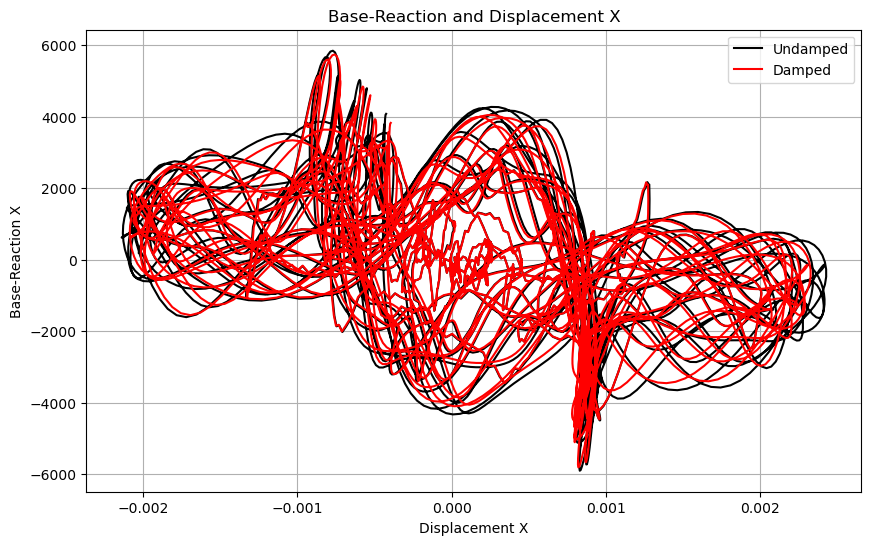

In [18]:
### BASE REACTION & DISPALCEMENT IN X:
X1 =  DISP_X_undamped
X2 =  DISP_X_damped
Y1 = BASE_REACTION_X_undamped
Y2 = BASE_REACTION_X_damped
XLABEL = 'Displacement X'
YLABEL = 'Base-Reaction X'
TITLE = 'Base-Reaction and Displacement X'

PLOT_2D(X1, Y1, X2, Y2, XLABEL, YLABEL, TITLE)

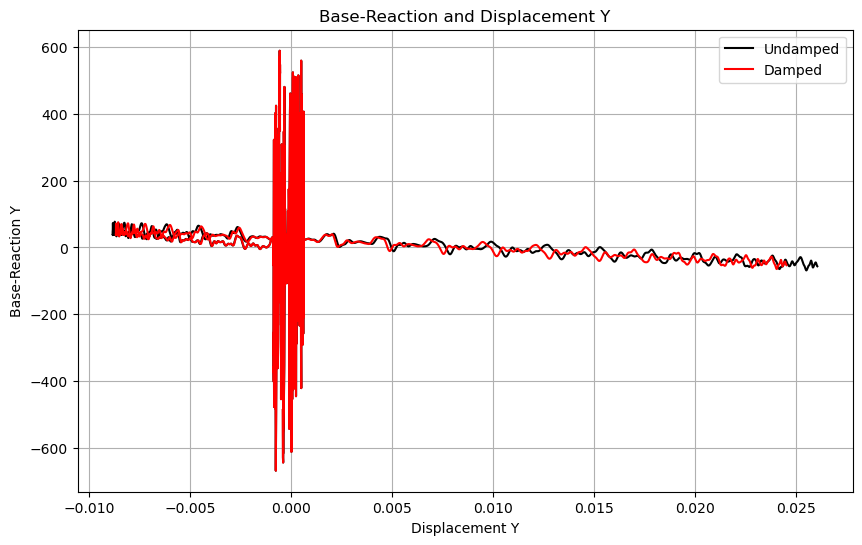

In [19]:
### BASE REACTION & DISPALCEMENT IN Y:
X1 =  DISP_Y_undamped
X2 =  DISP_Y_damped
Y1 = BASE_REACTION_Y_undamped
Y2 = BASE_REACTION_Y_damped
XLABEL = 'Displacement Y'
YLABEL = 'Base-Reaction Y'
TITLE = 'Base-Reaction and Displacement Y'

PLOT_2D(X1, Y1, X2, Y2, XLABEL, YLABEL, TITLE)

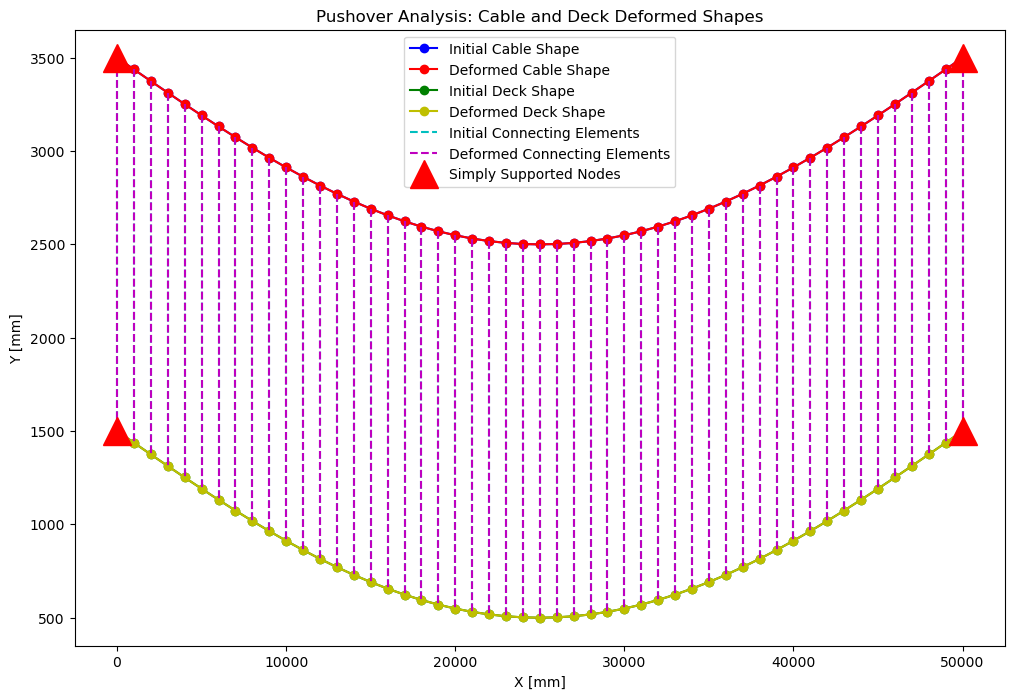

In [20]:
# Plot damped results
plot_shapes(initial_coords, DISPLACEMENTS_damped)

Plotting a histogram for the results of dynamic analysis of a structure, such as displacements, accelerations,
 and support reactions, helps analyze the statistical distribution and trends in the data.
 The following insights can be drawn from these histograms:

1. Range Identification
The histogram shows the range within which displacements, accelerations, or support reactions vary.
This is crucial for assessing the stability of the structure and determining the allowable design limits.
2. Central Tendency
From the histogram, measures like mean, median, or mode can be extracted.
This helps identify the most likely values and provides an overview of the dominant behavior of the structure.
3. Data Dispersion
The histogram illustrates the spread of the data (e.g., through its width and shape).
A wide histogram may indicate nonlinear behavior or unusual effects in the structure.
4. Anomaly Detection
Unexpected peaks or asymmetric distributions may indicate abnormal structural behavior (e.g., weaknesses or inelastic behavior).
It can also reveal specific phenomena like resonances or amplification effects.
5. Probability of Specific Values
The histogram's shape can indicate the probability distribution of the data (e.g., normal, uniform, or Poisson).
This is useful for simulations and predicting future structural behavior.
6. Behavior Under Specific Conditions
Analyzing histograms of acceleration or displacement can reveal dominant modes of the structure and their impact on overall response.
These insights are helpful in designing vibration control systems (e.g., dampers).
7. Impact of External Forces or Loading
An unusual histogram shape might suggest the influence of extraordinary dynamic loads (e.g., severe earthquakes or impact forces).
Conclusion:
Histograms are a simple yet effective tool for analyzing dynamic data. They help engineers and designers:

Understand the overall behavior of a structure.
Assess the likelihood of extreme or unexpected responses.
Define appropriate design or retrofitting criteria.
For deeper analysis, histograms can be combined with other statistical tools, such as standard deviation or spectral analysis.

-------------------------
Box-Chart Datas: 
Minimum: -2.1394e-03
First quartile: -6.7274e-04
Median: 3.4860e-05
Mean: 8.2728e-05
Std: 1.0912e-03
Third quartile: 8.9005e-04
Maximum: 2.4275e-03
Skewness: 3.5074e-02
kurtosis: -5.9403e-01
90% Confidence Interval: (-1.8625e-03, 2.0207e-03)
-------------------------


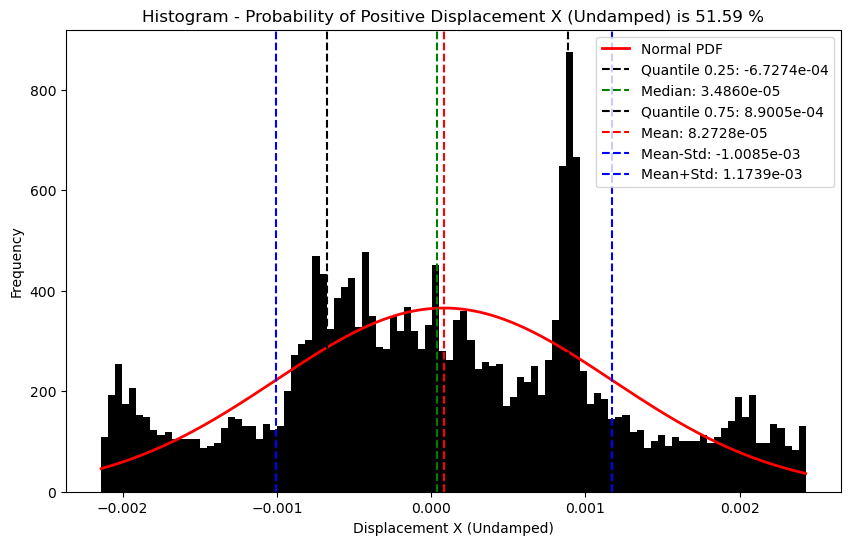

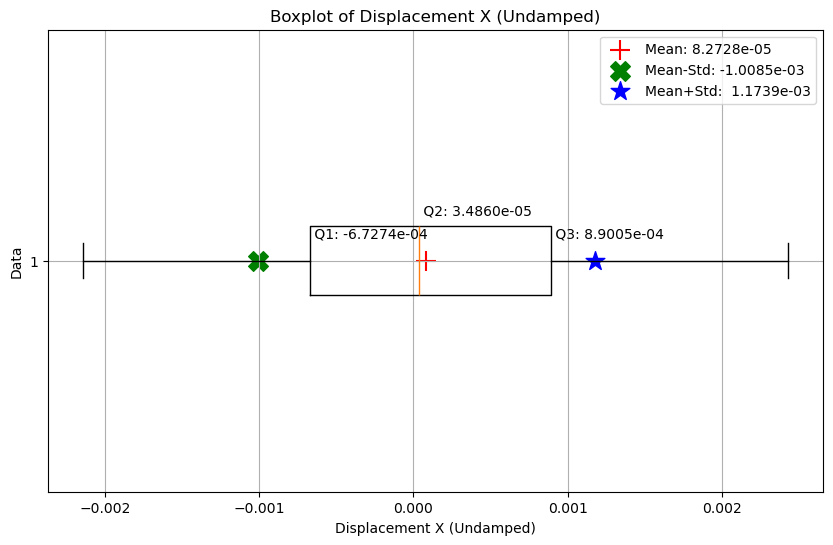

-------------------------
Box-Chart Datas: 
Minimum: -2.0867e-03
First quartile: -6.5401e-04
Median: 3.2939e-05
Mean: 7.9793e-05
Std: 1.0614e-03
Third quartile: 8.5735e-04
Maximum: 2.3266e-03
Skewness: 2.9756e-02
kurtosis: -6.0405e-01
90% Confidence Interval: (-1.8069e-03, 1.9820e-03)
-------------------------


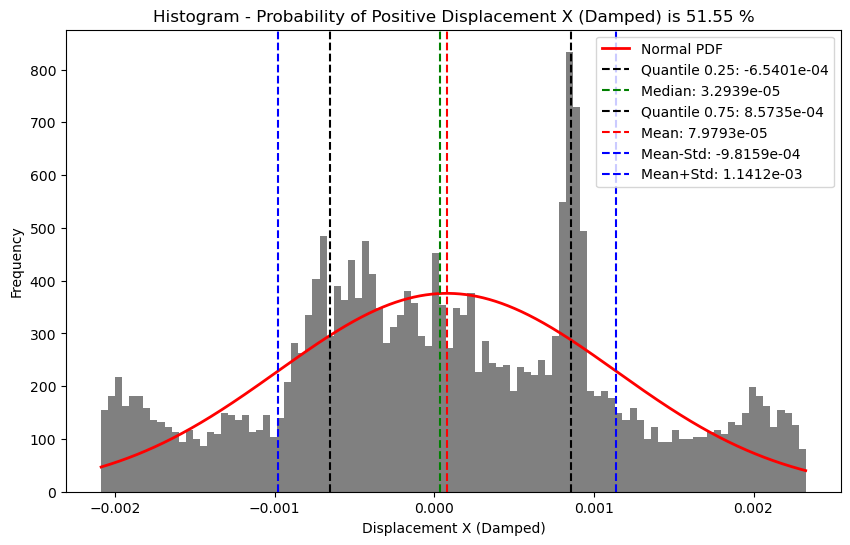

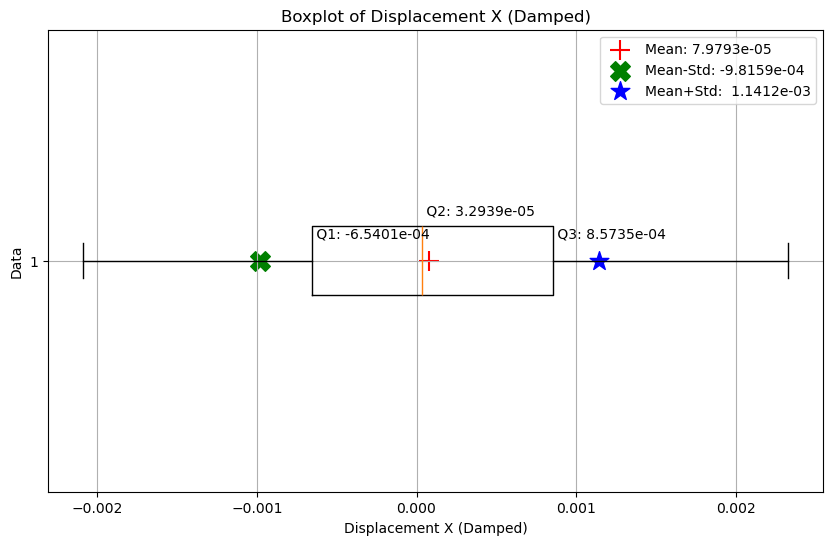

In [23]:
HISROGRAM_BOXPLOT(DISP_X_undamped, HISTO_COLOR='black', LABEL='Displacement X (Undamped)')
HISROGRAM_BOXPLOT(DISP_X_damped, HISTO_COLOR='grey', LABEL='Displacement X (Damped)')
#HISTOGRAM_BOXPLOT_PLOTLY(DISP_X_undamped, XLABEL='Displacement X (Undamped)', TITLE='Displacement X (Undamped)', COLOR='black')
#HISTOGRAM_BOXPLOT_PLOTLY(DISP_X_damped, XLABEL='Displacement X (Damped)', TITLE='Displacement X (Damped)', COLOR='grey')

-------------------------
Box-Chart Datas: 
Minimum: -8.8475e-03
First quartile: -5.8956e-03
Median: -2.1448e-04
Mean: 2.6015e-03
Std: 1.0504e-02
Third quartile: 9.2083e-03
Maximum: 2.6058e-02
Skewness: 9.0460e-01
kurtosis: -4.5237e-01
90% Confidence Interval: (-8.7370e-03, 2.4118e-02)
-------------------------


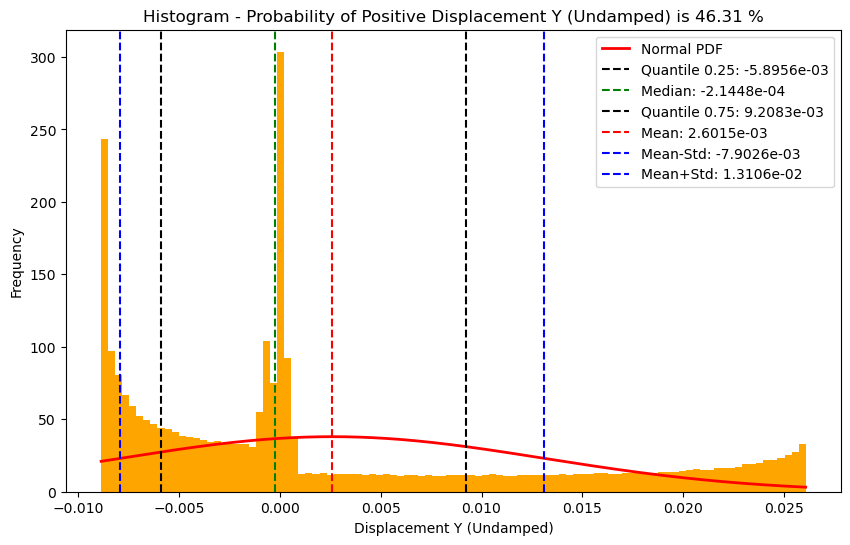

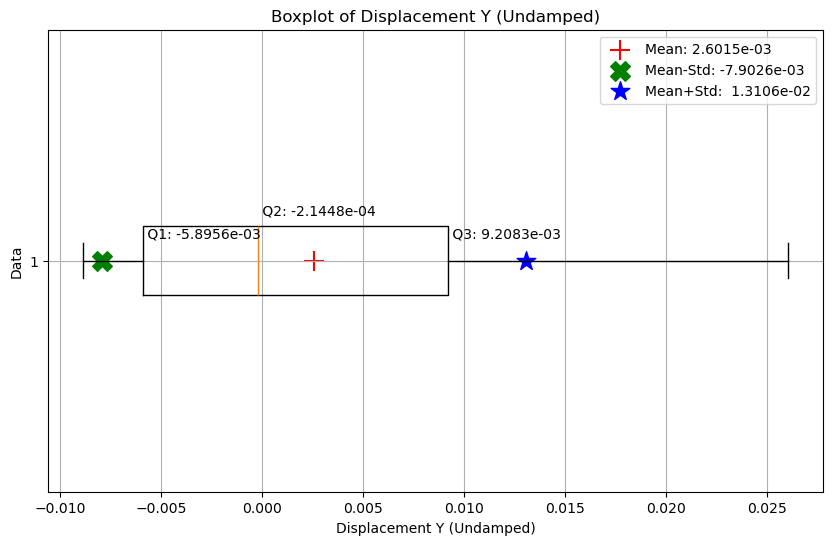

-------------------------
Box-Chart Datas: 
Minimum: -8.6910e-03
First quartile: -5.7980e-03
Median: -2.1141e-04
Mean: 2.3839e-03
Std: 1.0037e-02
Third quartile: 8.8253e-03
Maximum: 2.4528e-02
Skewness: 8.7794e-01
kurtosis: -4.9601e-01
90% Confidence Interval: (-8.5794e-03, 2.2784e-02)
-------------------------


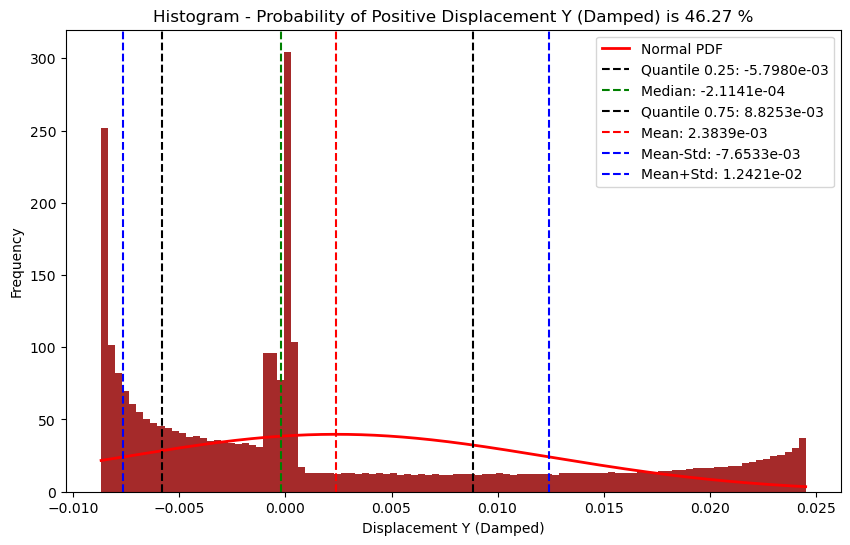

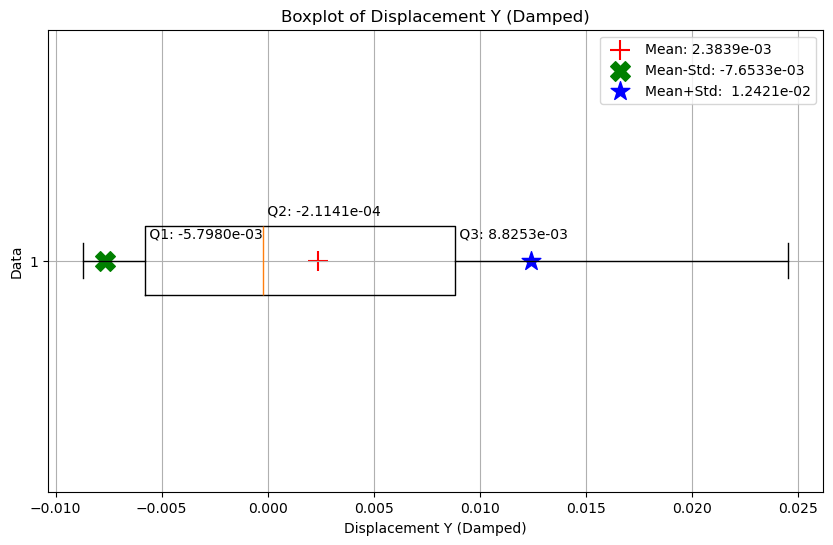

In [24]:
HISROGRAM_BOXPLOT(DISP_Y_undamped, HISTO_COLOR='orange', LABEL='Displacement Y (Undamped)')
HISROGRAM_BOXPLOT(DISP_Y_damped, HISTO_COLOR='brown', LABEL='Displacement Y (Damped)')
#HISTOGRAM_BOXPLOT_PLOTLY(DISP_Y_undamped, XLABEL='Displacement Y (Undamped)', TITLE='Displacement Y (Undamped)', COLOR='orange')
#HISTOGRAM_BOXPLOT_PLOTLY(DISP_Y_damped, XLABEL='Displacement Y (Damped)', TITLE='Displacement Y (Damped)', COLOR='brown')

-------------------------
Box-Chart Datas: 
Minimum: -2.1197e-03
First quartile: -3.8150e-04
Median: 6.8154e-04
Mean: 5.2112e-04
Std: 9.8845e-04
Third quartile: 1.4493e-03
Maximum: 2.0433e-03
Skewness: -3.2128e-01
kurtosis: -1.2248e+00
90% Confidence Interval: (-1.0664e-03, 1.7672e-03)
-------------------------


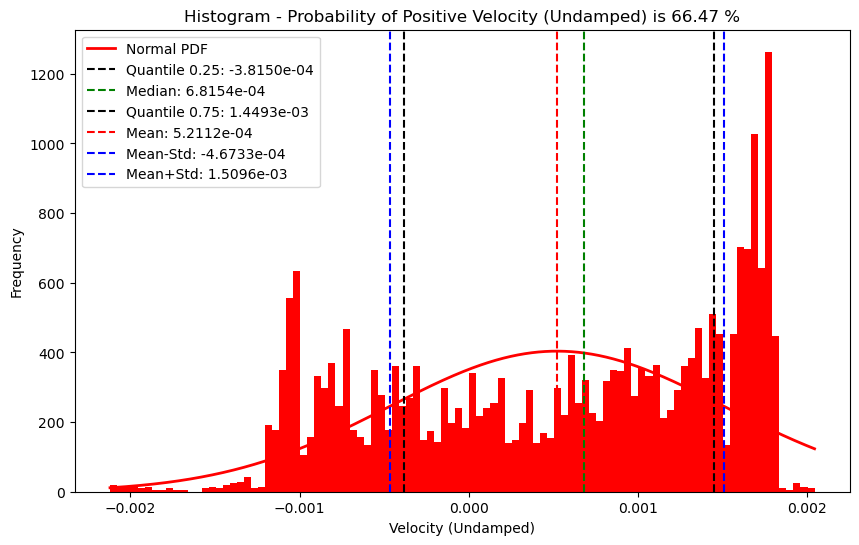

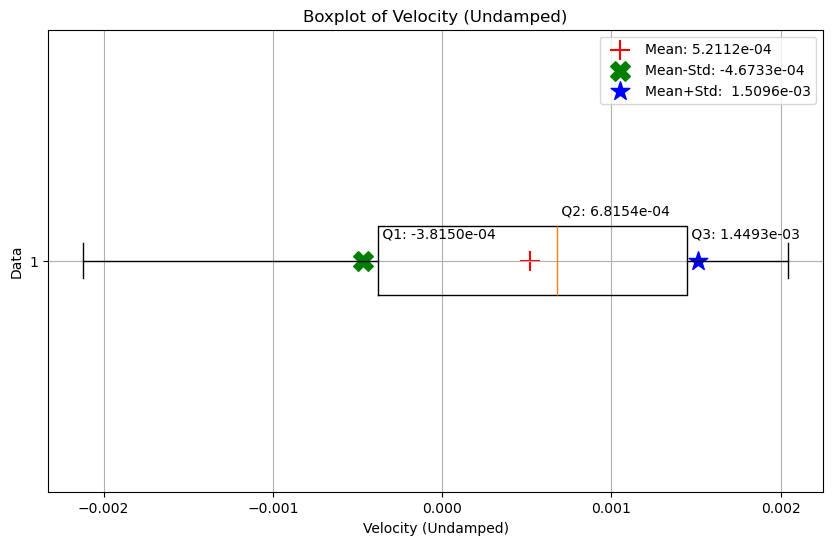

-------------------------
Box-Chart Datas: 
Minimum: -2.1192e-03
First quartile: -3.7384e-04
Median: 6.6529e-04
Mean: 4.9051e-04
Std: 9.5334e-04
Third quartile: 1.3831e-03
Maximum: 2.0425e-03
Skewness: -3.4912e-01
kurtosis: -1.1814e+00
90% Confidence Interval: (-1.0584e-03, 1.6824e-03)
-------------------------


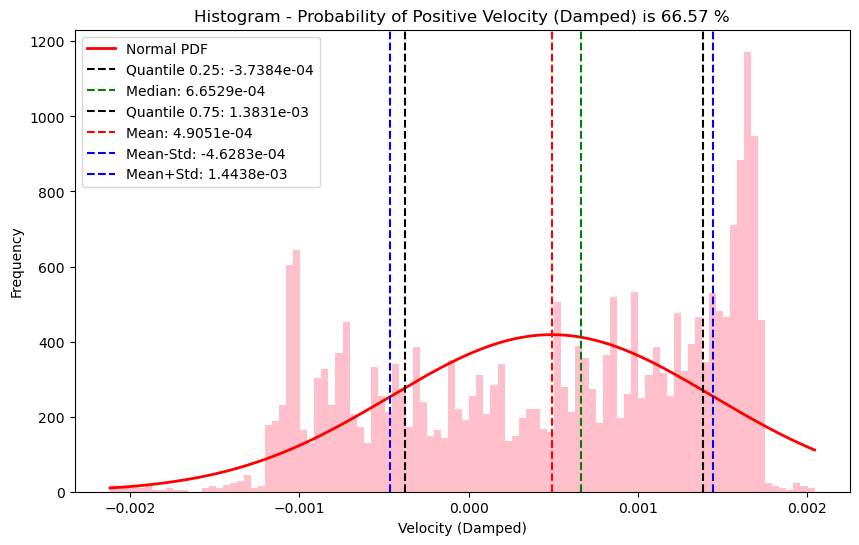

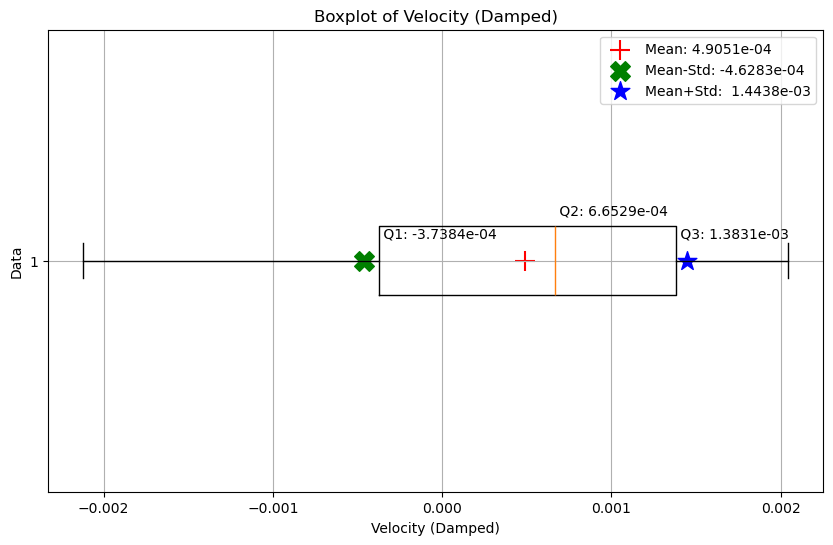

In [25]:
HISROGRAM_BOXPLOT(VELOCITY_undamped, HISTO_COLOR='red', LABEL='Velocity (Undamped)')
HISROGRAM_BOXPLOT(VELOCITY_damped, HISTO_COLOR='pink', LABEL='Velocity (Damped)')
#HISTOGRAM_BOXPLOT_PLOTLY(VELOCITY_undamped, XLABEL='Velocity (Undamped)', TITLE='Velocity (Undamped)', COLOR='red')
#HISTOGRAM_BOXPLOT_PLOTLY(VELOCITY_damped, XLABEL='Velocity (Damped)', TITLE='Velocity (Damped)', COLOR='pink')

-------------------------
Box-Chart Datas: 
Minimum: -2.9307e-02
First quartile: -1.8025e-04
Median: 4.7640e-05
Mean: 1.1398e-05
Std: 5.0689e-03
Third quartile: 2.5403e-04
Maximum: 3.3247e-02
Skewness: 8.0167e-02
kurtosis: 1.1514e+01
90% Confidence Interval: (-7.6501e-03, 6.9218e-03)
-------------------------


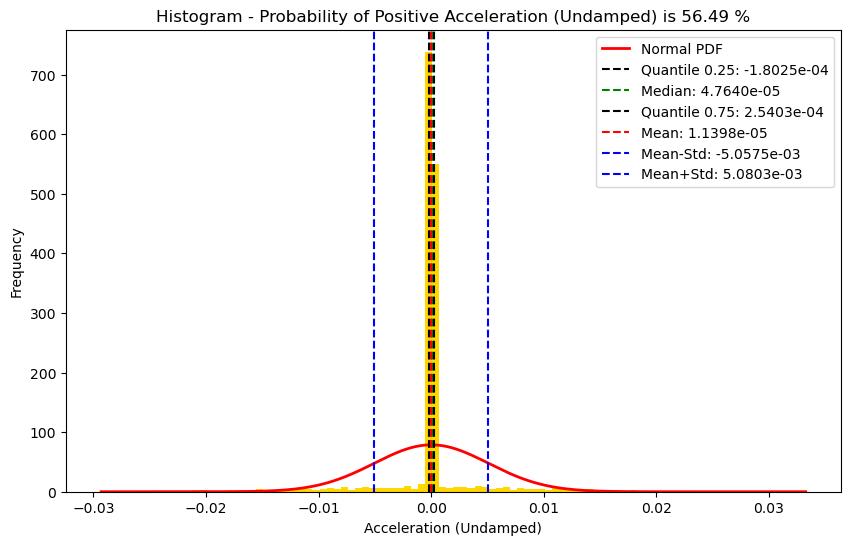

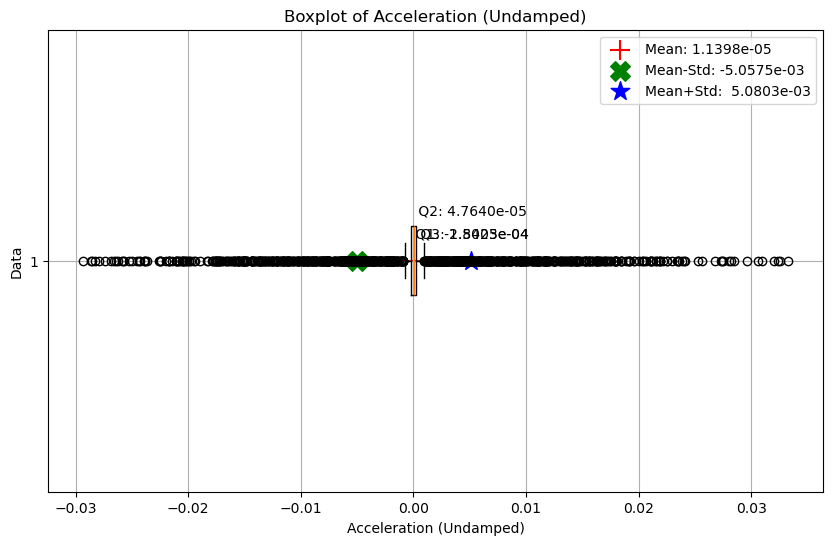

-------------------------
Box-Chart Datas: 
Minimum: -2.9310e-02
First quartile: -1.7526e-04
Median: 4.5013e-05
Mean: 1.0018e-05
Std: 5.0686e-03
Third quartile: 2.4591e-04
Maximum: 3.3251e-02
Skewness: 8.1075e-02
kurtosis: 1.1518e+01
90% Confidence Interval: (-7.6482e-03, 6.9205e-03)
-------------------------


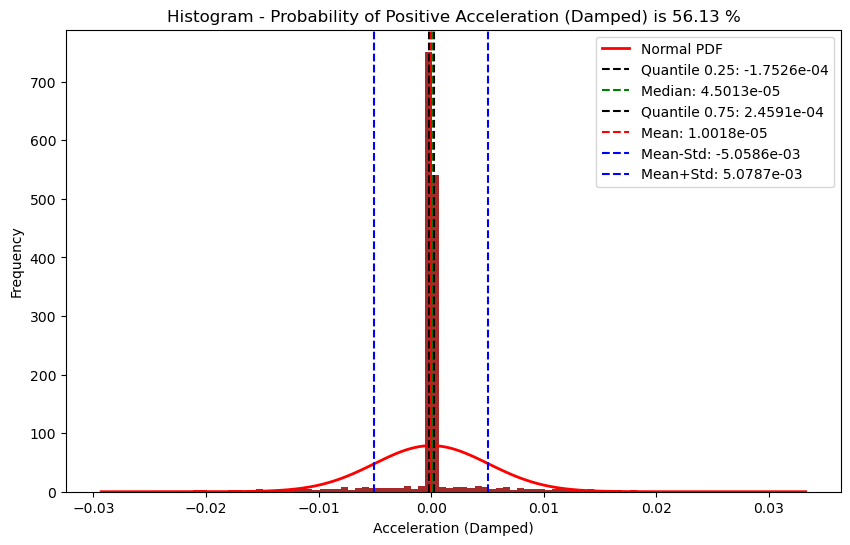

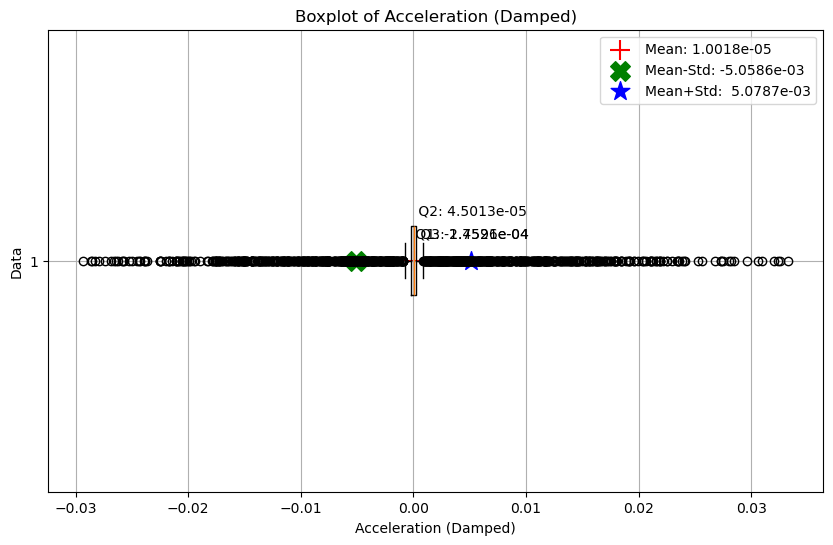

In [26]:
HISROGRAM_BOXPLOT(ACCELERATION_undamped, HISTO_COLOR='gold', LABEL='Acceleration (Undamped)')
HISROGRAM_BOXPLOT(ACCELERATION_damped, HISTO_COLOR='brown', LABEL='Acceleration (Damped)')
#HISTOGRAM_BOXPLOT_PLOTLY(ACCELERATION_undamped, XLABEL='Acceleration (Undamped)', TITLE='Acceleration (Undamped)', COLOR='gold')
#HISTOGRAM_BOXPLOT_PLOTLY(ACCELERATION_damped, XLABEL='Acceleration (Damped)', TITLE='Acceleration (Damped)', COLOR='brown')

-------------------------
Box-Chart Datas: 
Minimum: -5.9023e+03
First quartile: -1.4850e+03
Median: 3.2669e+00
Mean: 6.1021e+00
Std: 2.1064e+03
Third quartile: 1.4761e+03
Maximum: 5.8480e+03
Skewness: -1.0769e-02
kurtosis: -3.3829e-01
90% Confidence Interval: (-3.5393e+03, 3.4993e+03)
-------------------------


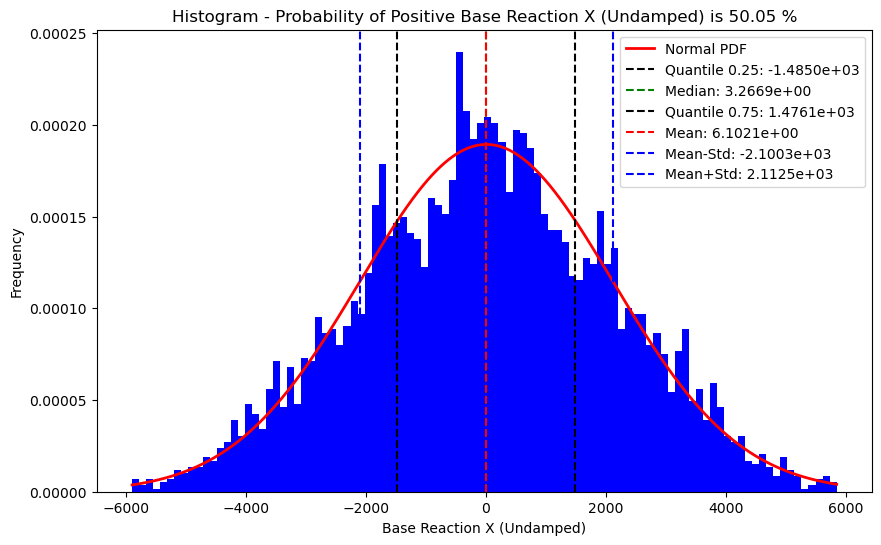

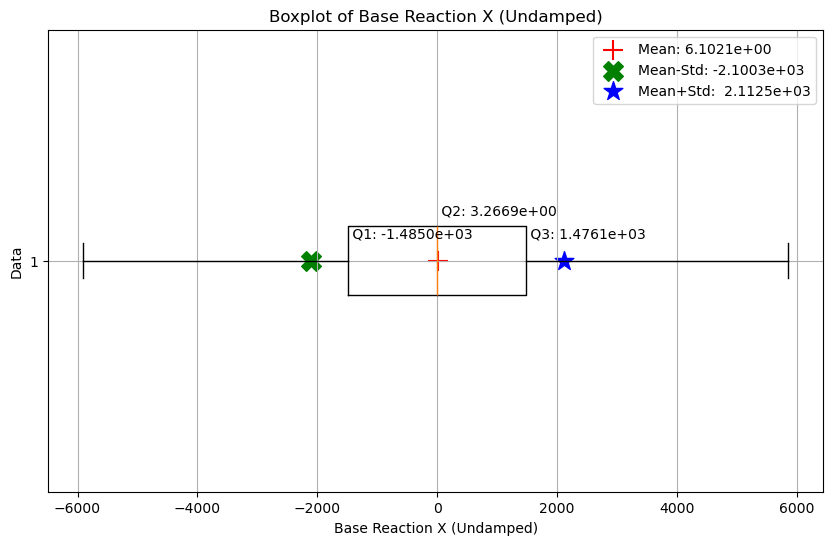

-------------------------
Box-Chart Datas: 
Minimum: -5.8070e+03
First quartile: -1.4466e+03
Median: 1.8869e+00
Mean: 4.8415e+00
Std: 2.0436e+03
Third quartile: 1.4434e+03
Maximum: 5.7438e+03
Skewness: -1.2608e-02
kurtosis: -3.3154e-01
90% Confidence Interval: (-3.3994e+03, 3.3421e+03)
-------------------------


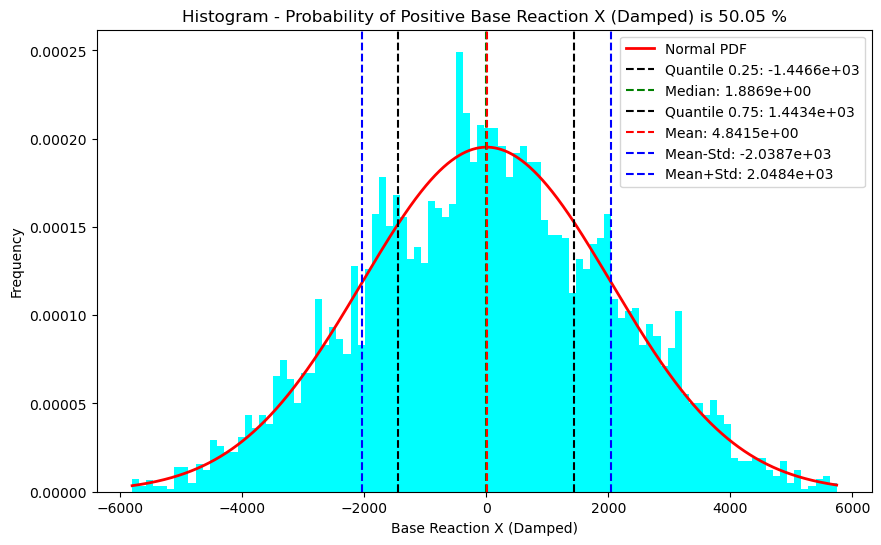

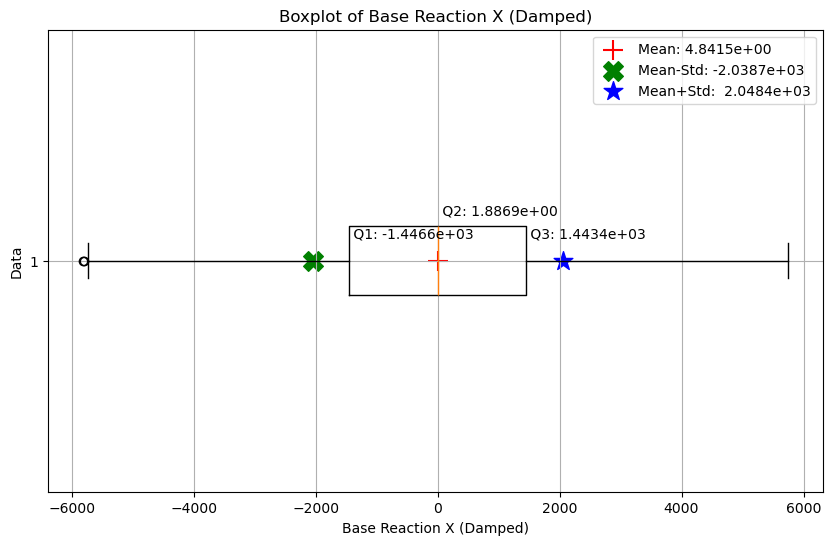

In [27]:
HISROGRAM_BOXPLOT(BASE_REACTION_X_undamped, HISTO_COLOR='blue', LABEL='Base Reaction X (Undamped)')
HISROGRAM_BOXPLOT(BASE_REACTION_X_damped, HISTO_COLOR='cyan', LABEL='Base Reaction X (Damped)')
#HISTOGRAM_BOXPLOT_PLOTLY(BASE_REACTION_X_undamped, XLABEL='Base Reaction X (Undamped)', TITLE='Base Reaction X (Undamped)', COLOR='blue')
#HISTOGRAM_BOXPLOT_PLOTLY(BASE_REACTION_X_damped, XLABEL='Base Reaction X (Damped)', TITLE='Base Reaction X (Damped)', COLOR='cyan')

-------------------------
Box-Chart Datas: 
Minimum: -6.6879e+02
First quartile: -2.4274e+01
Median: 2.1118e+01
Mean: 1.1160e+01
Std: 1.0559e+02
Third quartile: 4.3001e+01
Maximum: 5.8937e+02
Skewness: -3.7615e-01
kurtosis: 9.1616e+00
90% Confidence Interval: (-1.4260e+02, 1.5412e+02)
-------------------------


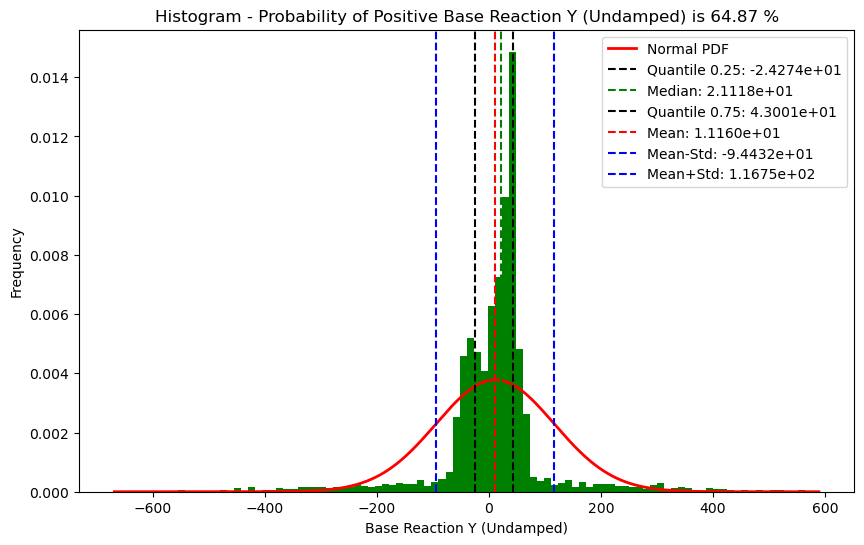

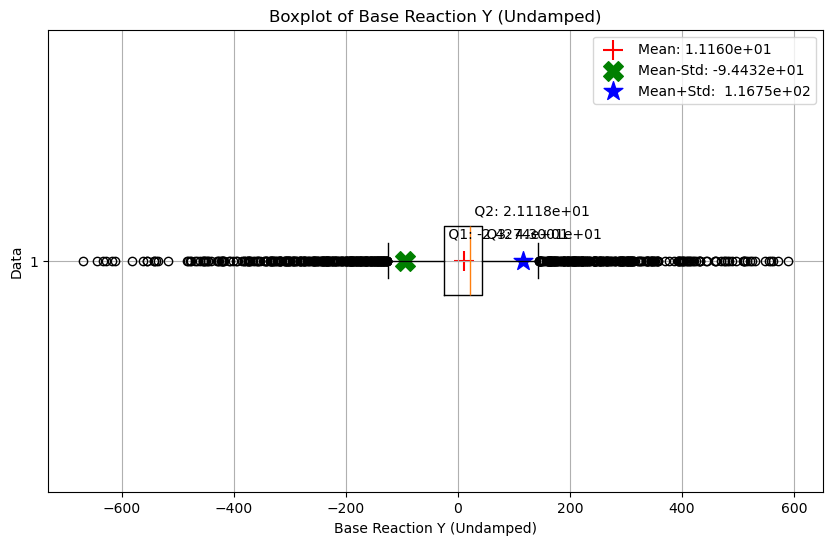

-------------------------
Box-Chart Datas: 
Minimum: -6.6872e+02
First quartile: -2.3221e+01
Median: 2.0763e+01
Mean: 1.1187e+01
Std: 1.0528e+02
Third quartile: 4.2169e+01
Maximum: 5.8934e+02
Skewness: -3.7837e-01
kurtosis: 9.3045e+00
90% Confidence Interval: (-1.4266e+02, 1.5409e+02)
-------------------------


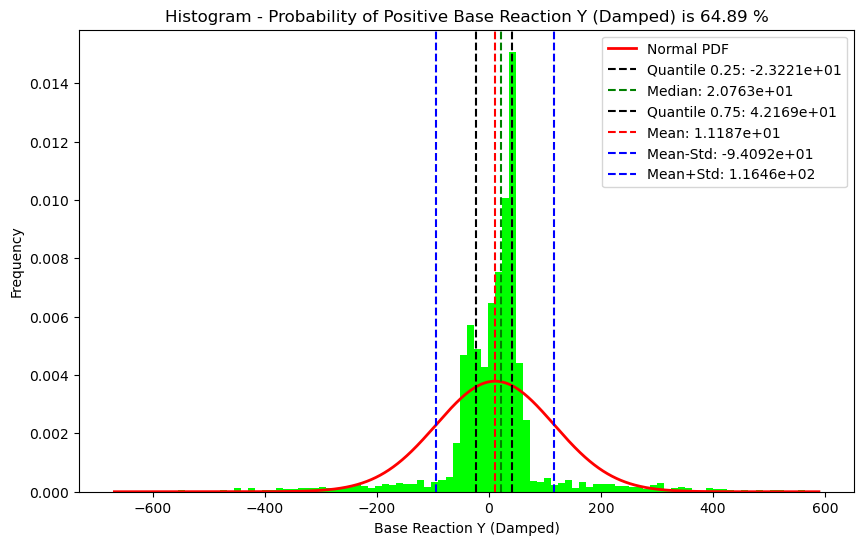

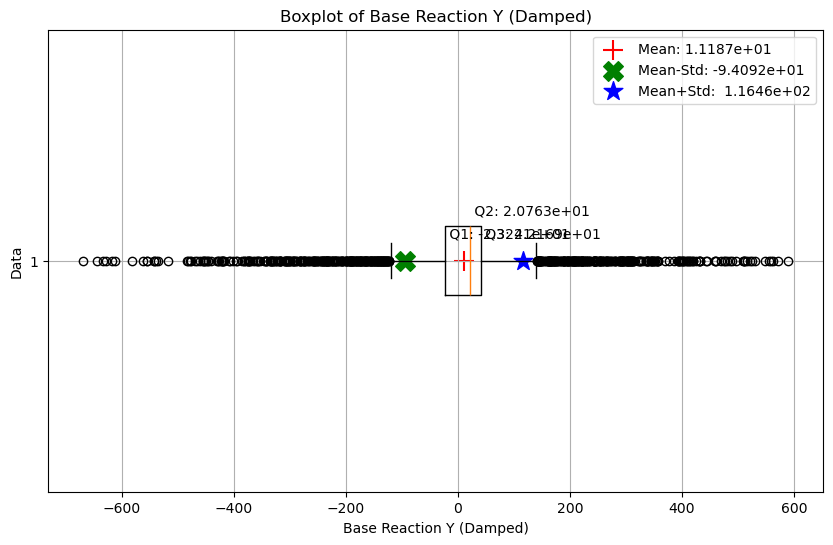

In [28]:
HISROGRAM_BOXPLOT(BASE_REACTION_Y_undamped, HISTO_COLOR='green', LABEL='Base Reaction Y (Undamped)')
HISROGRAM_BOXPLOT(BASE_REACTION_Y_damped, HISTO_COLOR='lime', LABEL='Base Reaction Y (Damped)')
#HISTOGRAM_BOXPLOT_PLOTLY(BASE_REACTION_Y_undamped, XLABEL='Base Reaction Y (Undamped)', TITLE='Base Reaction Y (Undamped)', COLOR='green')
#HISTOGRAM_BOXPLOT_PLOTLY(BASE_REACTION_Y_damped, XLABEL='Base Reaction Y (Damped)', TITLE='Base Reaction Y (Damped)', COLOR='lime')